<a href="https://colab.research.google.com/github/Nikhila-KS/Unravel_ML/blob/main/7_Heart_beat_audio_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u>Heartbeat Audio Classification</u></b> 💟

The ownership of the original work lies with Nittala Venkata Sai Aditya, Gandhi Disha, Saibhargav, Tetali, Vishwak Venkatesh, and Soumith Reddy Palreddy.

Referenced Medium blog :     [LINK](https://medium.com/@vishwakvv29/heartbeat-audio-classification-using-machine-learning-305e568efecc)

While embarking on my internship project centered around heart rate classification, I eagerly delved into the abundant resources in Google.

Fortunately, I chanced upon their exceptional Medium blog, which presented a remarkable project aligned seamlessly with my own objectives.

##🔸Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import re
import os
import os.path
from pathlib import Path
import glob
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
import imageio
from IPython.display import Image
import matplotlib.image as mpimg
!pip install pydub
# import pydub
from scipy.io.wavfile import read, write
import librosa
import librosa.display
import IPython
from IPython.display import Audio
import scipy
from scipy.signal import spectrogram
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
!pip install tensorflow
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN,\
LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D,Reshape,\
Conv2DTranspose, LeakyReLU, Conv1D, AveragePooling1D, MaxPooling1D, MaxPool1D, GlobalAvgPool1D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.datasets import mnist
!pip install keras
import keras
from tensorflow.keras import regularizers
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
!pip install catboost
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning)
filterwarnings("ignore", category=UserWarning)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 4.5 MB/s eta 0:00:00


## 🔸Read Data

In [2]:
from google.colab import drive
drive.mount('/content/drive')
# Upload data
from zipfile import ZipFile
file_name = '/content/drive/My Drive/Data.zip'
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('done')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
done


In [3]:
# INPUT_PATH = "Data/"
# SAMPLE_RATE = 22050
set_a_normal_audios = pd.read_csv('Data/Set A/Atraining_normal_seg.csv')
set_b_normal_audios = pd.read_csv('Data/Set B/Btraining_normal_seg.csv')
set_a_normal_audios.head(5)
# set_a_normal_audios = pd.read_csv('Atraining_normal_seg.csv')
# set_b_normal_audios = pd.read_csv('Btraining_normal_seg.csv')
# set_a_normal_audios.head(5)

,Unnamed: 0,S1,S2,S1.1,S2.1,S1.2,S2.2,S1.3,S2.3,S1.4,...,S2.14,S1.15,S2.15,S1.16,S2.16,S1.17,S2.17,S1.18,S2.18,Unnamed: 39
0,201102081321.aif,10021.0,20759,35075,47244,62992,73729,88761,101646,115246,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201102260502.aif,NaN,11526,27941,42197,58163,71278,88955,102641,122028,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201103090635.aif,5366.0,17632,31432,44464,59030,71296,86629,99661,116527,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,201103140132.aif,16358.0,29272,89539,105036,128282,142057,170469,183383,207490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,201103140822.aif,3444.0,18080,44770,58545,84374,98149,123977,134309,157555,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 🔸Loading and visualizing a sample wave

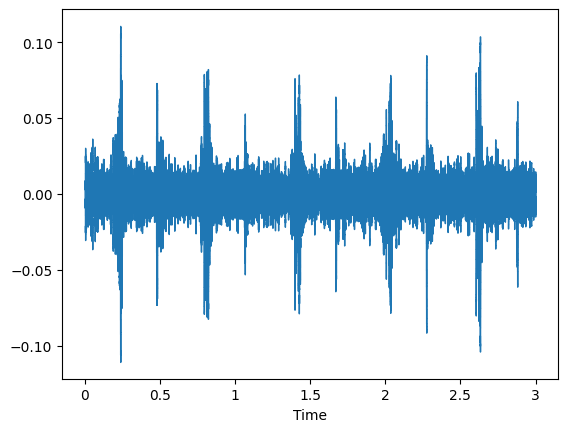

In [4]:
sampledata, sampling_rate = librosa.load('Data/Set A/audio_files/normal__201102081321.wav', duration=3)
librosa.display.waveshow(sampledata, sr=sampling_rate)

## 🔸 Loading all the metadata for set A and B

In [5]:
set_a_metadata = pd.read_csv('Data/Set A/set_a.csv').drop('sublabel', axis = 1).dropna()
set_b_metadata = pd.read_csv('Data/Set B/set_b.csv').drop('sublabel', axis = 1).dropna()
print("SET A ")
set_a_metadata

SET A 


,dataset,fname,label
0,a,set_a/artifact__201012172012.wav,artifact
1,a,set_a/artifact__201105040918.wav,artifact
2,a,set_a/artifact__201105041959.wav,artifact
3,a,set_a/artifact__201105051017.wav,artifact
4,a,set_a/artifact__201105060108.wav,artifact
...,...,...,...
119,a,set_a/normal__201106221450.wav,normal
120,a,set_a/normal__201108011112.wav,normal
121,a,set_a/normal__201108011114.wav,normal
122,a,set_a/normal__201108011115.wav,normal


## 🔸 Checking class label for set A and set B

In [6]:
print("SET A")
set_a_metadata['label'].value_counts()


SET A


artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

In [7]:
print("SET B")
set_b_metadata['label'].value_counts()

SET B


normal        320
murmur         95
extrastole     46
Name: label, dtype: int64

## 🔸Merging both the sets together

In [8]:
total_train_metadata = pd.concat([set_a_metadata, set_b_metadata], ignore_index=True) # concatenation

## 🔸some important functions to generate features


In [9]:
INPUT_PATH = "Data/"
SAMPLE_RATE = 22050
def load_audio_timeseries(fileName, setName, offset=0, duration=None):
    if setName == 'a' :
        y, sr = librosa.load("Data/Set A/audio_files/" + fileName, sr=SAMPLE_RATE, offset=offset, duration=duration)
    elif setName == 'b' :
        y, sr = librosa.load("Data/Set B/audio_files/" + fileName, sr=SAMPLE_RATE, offset=offset, duration=duration)
    else:
        sys.exit('Please enter a valid Set')
    return(y)

The code you provided is a Python function that loads an audio timeseries from a file. The function takes three arguments:

fileName: The name of the audio file to load.
setName: The set that the audio file belongs to (A or B).
offset: The offset into the audio file to start loading from.
duration: The duration of the audio file to load.
The function first checks the value of setName. If setName is equal to 'a', the function loads the audio file from the Set A/audio_files directory. If setName is equal to 'b', the function loads the audio file from the Set B/audio_files directory. If setName is not equal to 'a' or 'b', the function exits the program with an error message.

Once the audio file has been loaded, the function returns the audio timeseries as a NumPy array. The audio timeseries is a two-dimensional array, where the first dimension represents the time steps and the second dimension represents the audio channels.

## 🔸 generating required features

In [10]:
total_train_metadata['fname'] = total_train_metadata['fname'].apply(lambda f:f.split('/')[1])

# Remove the prefix "Btraining_" from the fname column.
total_train_metadata['fname'] =  [re.sub(r'Btraining_','', str(x)) for x in total_train_metadata['fname']]

# Load the audio timeseries for each audio file.
total_train_metadata['time_series']=total_train_metadata.apply(lambda row:load_audio_timeseries(row['fname'],row['dataset']),axis=1)

# Calculate the duration of each audio file in seconds.
total_train_metadata['audio_duration'] = round(total_train_metadata['time_series'].apply(len) / SAMPLE_RATE, 1)


## 🔸plotting the pie chart to represent the class distribution across the training data

<Axes: ylabel='fname'>

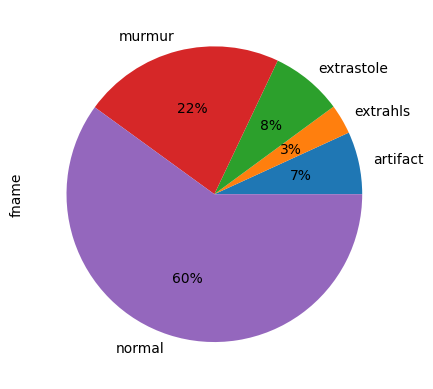

In [11]:
total_train_metadata.groupby('label')["fname"].count().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10})

# The code you provided is a Python code that plots a pie chart of the number of audio files in each label.
# The code takes a Pandas DataFrame called total_train_metadata as input. The DataFrame contains the following columns:
# label: The label of the audio file (cat or dog).
# fname: The name of the audio file.
# The code first groups the DataFrame by the label column. This means that the code creates a new DataFrame with one row
# for each label.The new DataFrame contains the following columns:
# label: The label of the audio file.
# count: The number of audio files in the label.
# The code then plots a pie chart of the count column. The pie chart shows the percentage of audio files in each label.
#  The autopct parameter is used to display the percentage value as a percentage in the pie chart. The textprops parameter is
#  used to set the font size of the percentage values in the pie chart.


## 🔸 Plotting the different types of wave in order to find out the distinguishing features

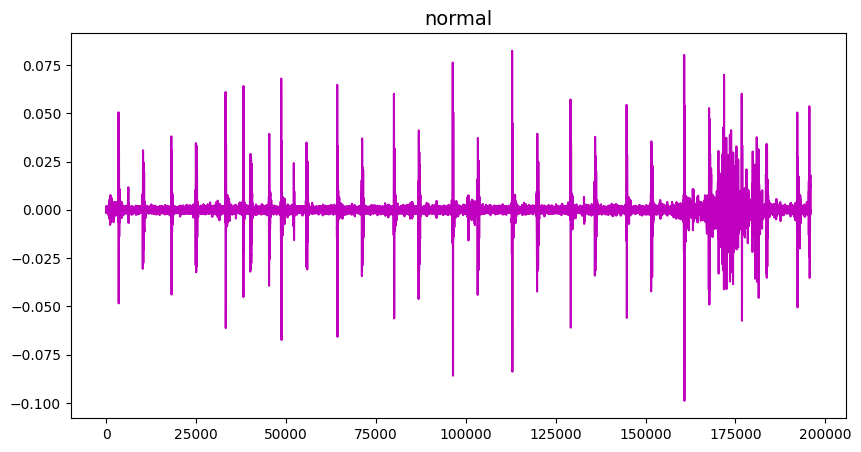

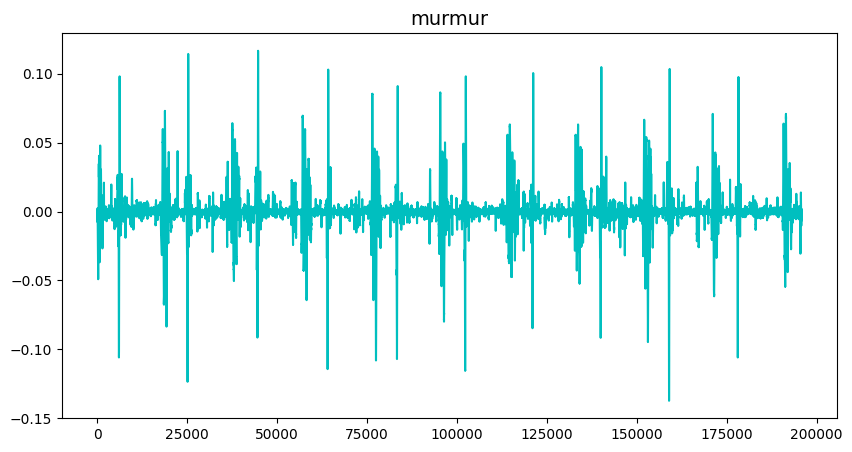

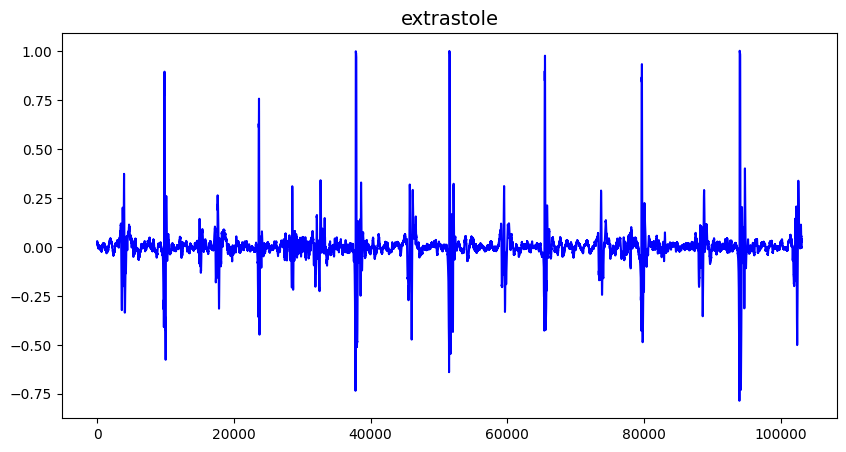

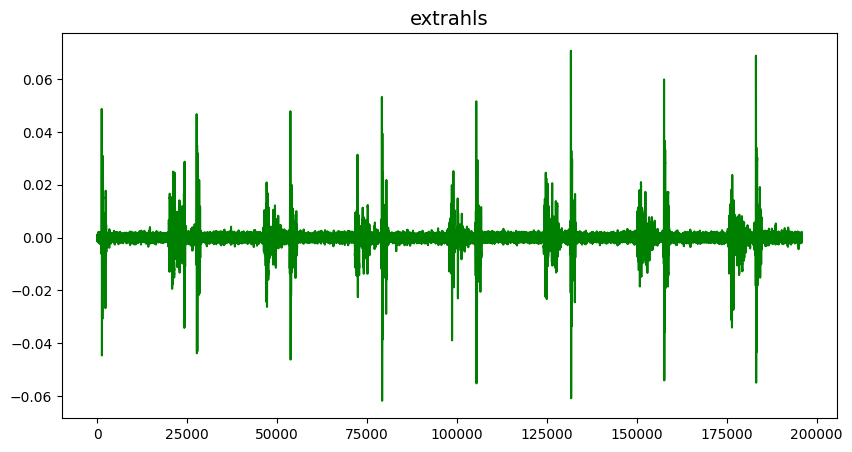

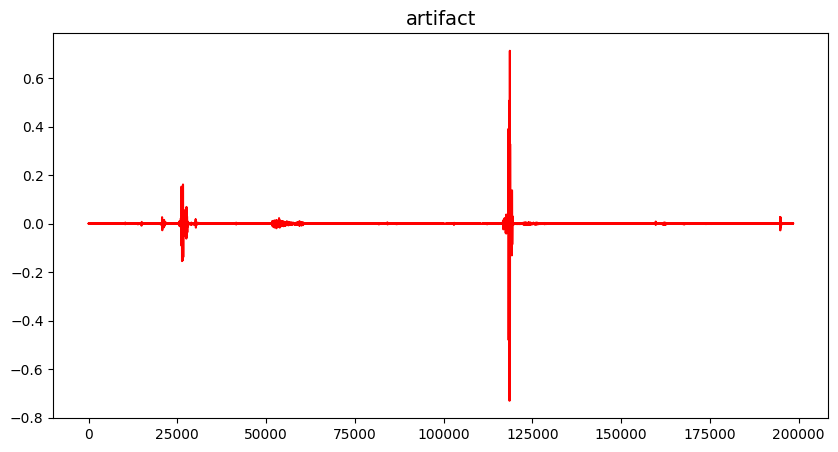

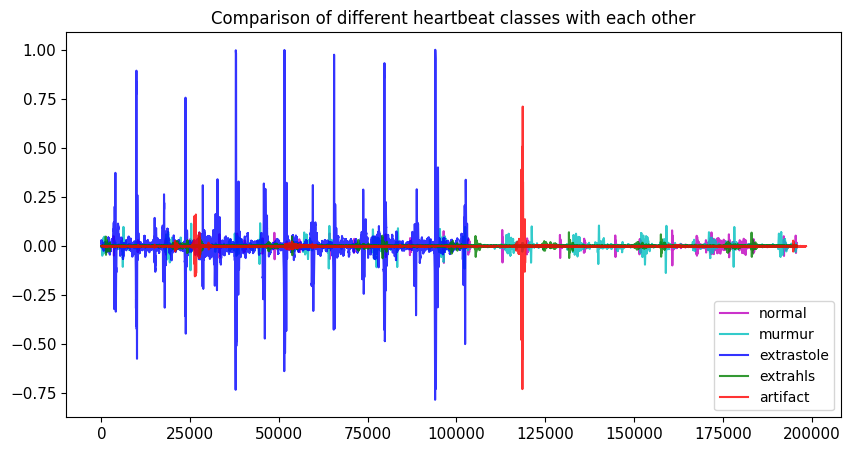

In [12]:
normal = total_train_metadata.loc[total_train_metadata['label'] == 'normal'].head(1)
murmur = total_train_metadata.loc[total_train_metadata['label'] == 'murmur'].head(1)
extrastole = total_train_metadata.loc[total_train_metadata['label'] == 'extrastole'].head(1)
extrahls = total_train_metadata.loc[total_train_metadata['label'] == 'extrahls'].head(1)
artifact = total_train_metadata.loc[total_train_metadata['label'] == 'artifact'].head(1)

plt.figure(1, figsize=(10,5))
plt.title('normal', fontsize=14)
plt.plot(normal['time_series'].values[0], c='m')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.figure(2, figsize=(10, 5))
plt.title('murmur',  fontsize=14)
plt.plot(murmur['time_series'].values[0], c='c')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.figure(3, figsize=(10, 5))
plt.title('extrastole',  fontsize=14)
plt.plot(extrastole['time_series'].values[0], c='b')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.figure(4, figsize=(10, 5))
plt.title('extrahls',  fontsize=14)
plt.plot(extrahls['time_series'].values[0], c='g')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.figure(5, figsize=(10, 5))
plt.title('artifact',  fontsize=14)
plt.plot(artifact['time_series'].values[0], c='r')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.figure(6, figsize=(10, 5))
plt.plot(normal['time_series'].values[0], c='m', label='normal', alpha=0.8)
plt.plot(murmur['time_series'].values[0], c='c', label='murmur', alpha=0.8)
plt.plot(extrastole['time_series'].values[0], c='b', label='extrastole', alpha=0.8)
plt.plot(extrahls['time_series'].values[0], c='g', label='extrahls', alpha=0.8)
plt.plot(artifact['time_series'].values[0], c='r', label='artifact', alpha=0.8)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)


plt.title('Comparison of different heartbeat classes with each other',  fontsize=12)
plt.legend(loc='lower right',  fontsize=10)

## 🔸 Plotting the data to find the data source distribution


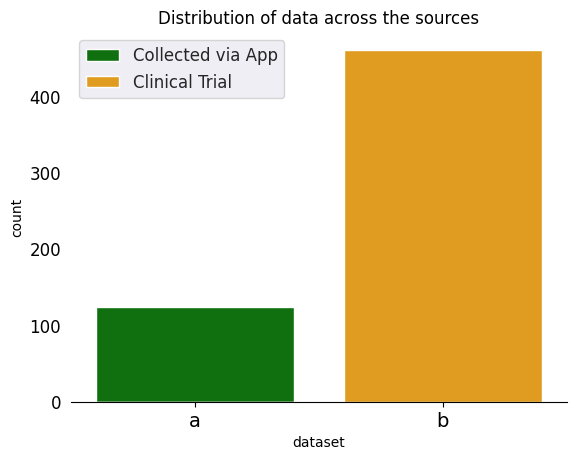

In [13]:
fig,ax = plt.subplots()
sns.set(font_scale=1.3)
color = ['green','orange','limegreen','darkgreen','royalblue','black','red','blue','navy']
sns.countplot(x='dataset',hue='dataset',data=total_train_metadata,dodge=False, palette=color)
plt.title('Distribution of data across the sources', fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=12)
plt.tick_params(left=False)
sns.despine(left=True)

plt.legend(loc='upper left', labels=['Collected via App','Clinical Trial'], fontsize=12)
plt.show()

## 🔸 summary statistics for audio duration across each class of heartbeat

In [14]:
total_train_metadata.groupby(total_train_metadata['label']).describe()['audio_duration']

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
artifact,40.0,9.000000,0.000000,9.0,9.00,9.00,9.000,9.0
extrahls,19.0,6.868421,2.822145,0.9,6.10,8.00,9.000,9.0
extrastole,46.0,5.856522,3.123648,1.9,3.60,5.15,7.675,13.4
murmur,129.0,7.765116,4.092670,0.9,4.60,7.90,9.200,24.2
normal,351.0,6.316524,4.346994,0.8,2.85,5.10,9.000,27.9


## 🔸oscillogram plots for all types of classes


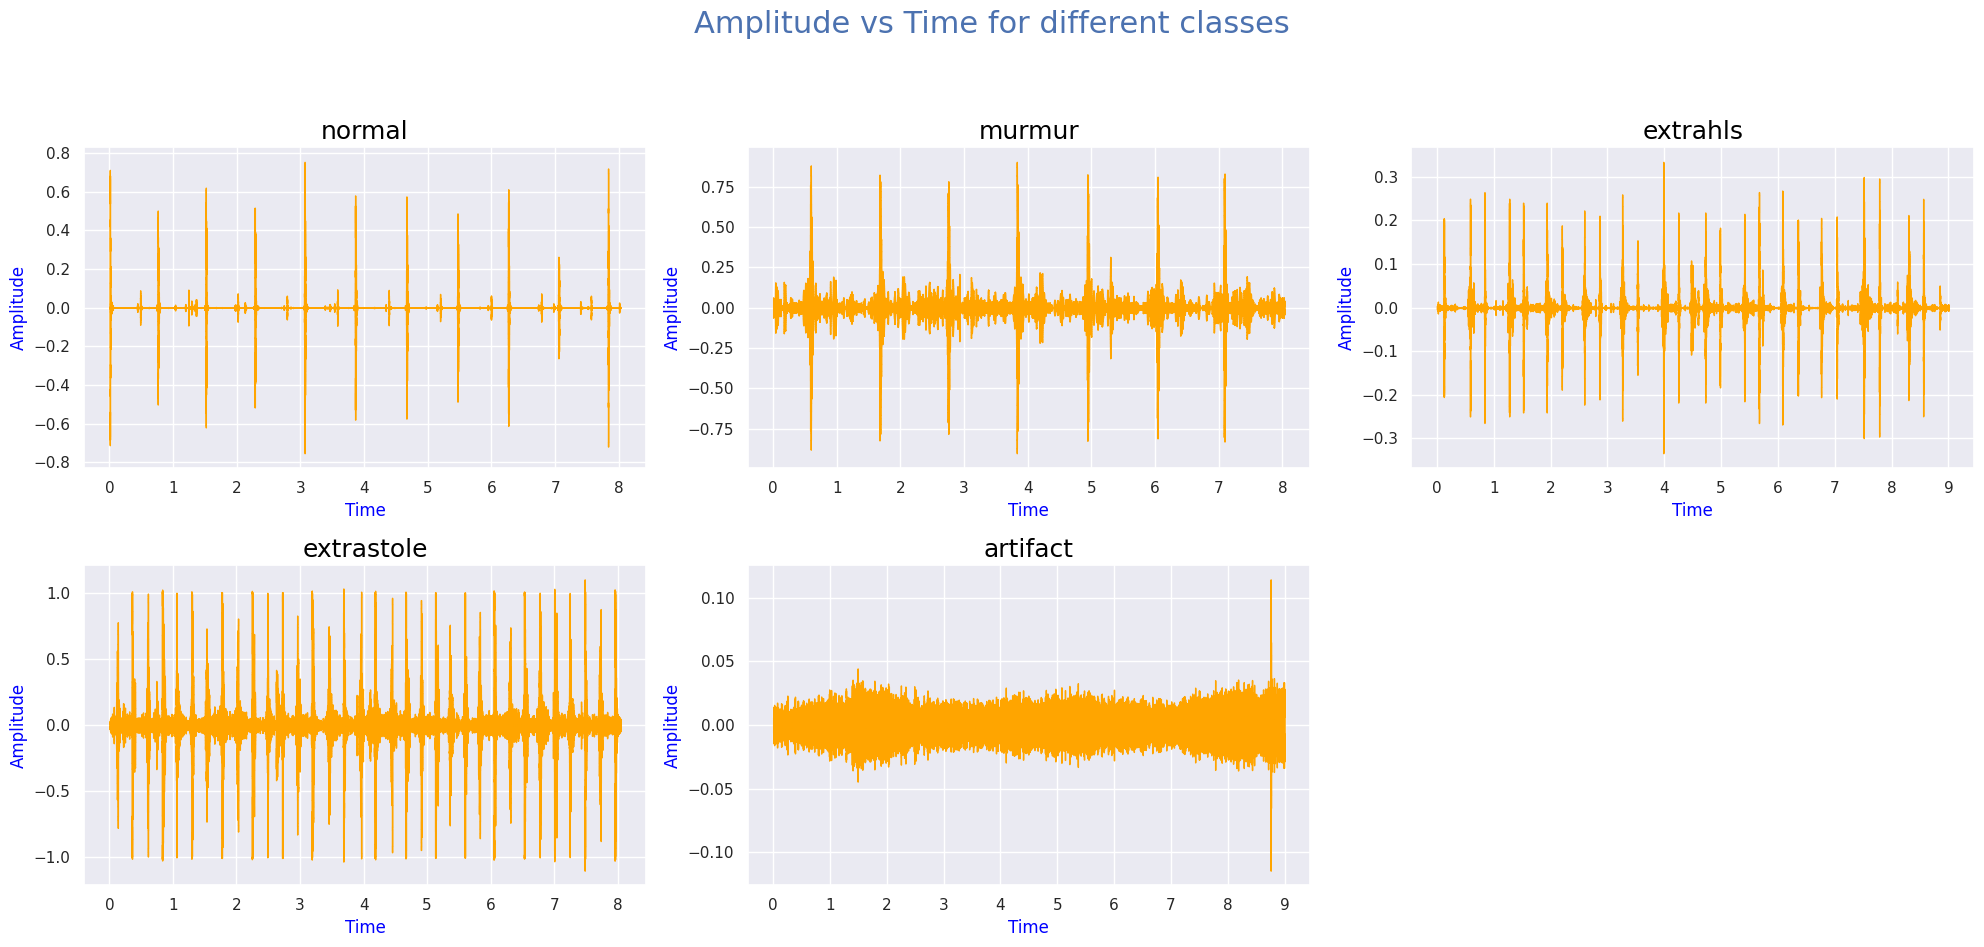

In [15]:
samples = ['normal__201103170121.wav', 'murmur__201101180902.wav', 'extrahls__201101241423.wav',
            'extrastole_235_1308749032454_B.wav', 'artifact__201106171003.wav']

sns.set(font_scale=1)

with plt.rc_context():
    plt.figure(figsize=(20,9), facecolor='None')
    plt.subplots_adjust(bottom=0.1e-5)
    plt.suptitle("Amplitude vs Time for different classes",x=0.5,y=1.05,fontsize=22, color='b')
    for i, f in enumerate(samples, 1):
        if i < 6:
            y, sr = librosa.load("Data/oscillogram_plots/" + f)
            plt.subplot(2, 3, i)
            librosa.display.waveshow(y, sr=SAMPLE_RATE, color='orange')
            plt.title(f.split("_")[0], fontsize=18, color='black')
            plt.xlabel('Time', fontsize=12, color='blue')
            plt.ylabel('Amplitude', fontsize=12, color='blue')
    plt.tight_layout()

## spectograms for all types of classes - couldn't see any significant spectograms

Text(0.5, 0, 'time')

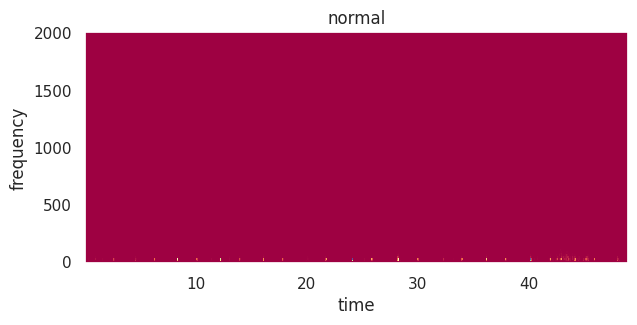

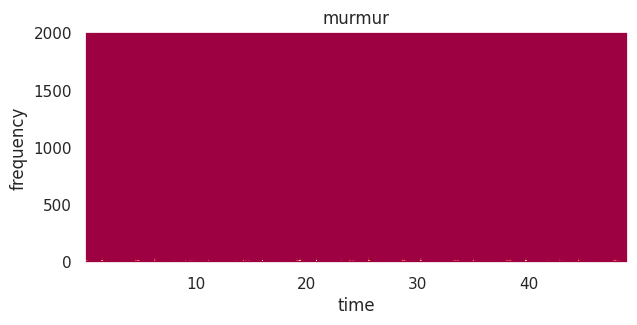

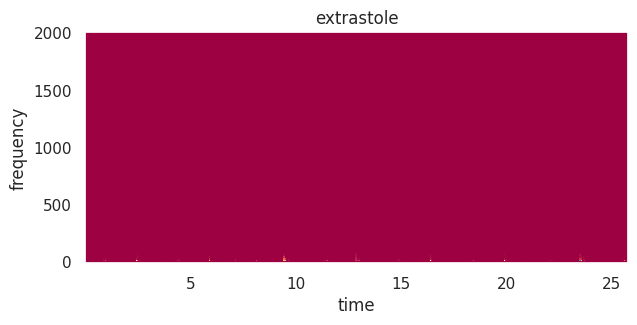

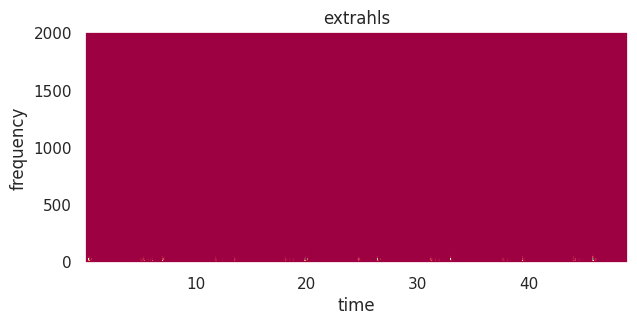

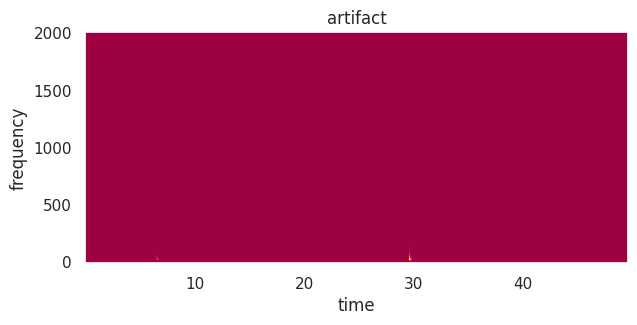

In [16]:
plt.figure(1, figsize=(7,3))
f_normal, t_normal, s_normal = spectrogram(normal['time_series'].values[0], 4000)
plt.title('normal')
plt.pcolormesh(t_normal, f_normal, s_normal, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(2, figsize=(7, 3))
f_murmur, t_murmur, s_murmur = spectrogram(murmur['time_series'].values[0], 4000)
plt.title('murmur')
plt.pcolormesh(t_murmur, f_murmur, s_murmur, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(3, figsize=(7, 3))
f_extrastole, t_extrastole, s_extrastole = spectrogram(extrastole['time_series'].values[0], 4000)
plt.title('extrastole')
plt.pcolormesh(t_extrastole, f_extrastole, s_extrastole, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(4, figsize=(7, 3))
f_extrahls, t_extrahls, s_extrahls = spectrogram(extrahls['time_series'].values[0], 4000)
plt.title('extrahls')
plt.pcolormesh(t_extrahls, f_extrahls, s_extrahls, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

plt.figure(5, figsize=(7, 3))
f_artifact, t_artifact, s_artifact = spectrogram(artifact['time_series'].values[0], 4000)
plt.title('artifact')
plt.pcolormesh(t_artifact, f_artifact, s_artifact, cmap='Spectral')
plt.ylabel('frequency')
plt.xlabel('time')

## 🔸talking about the class imbalance we can clearly see it through the below pie

<Axes: ylabel='audio_duration'>

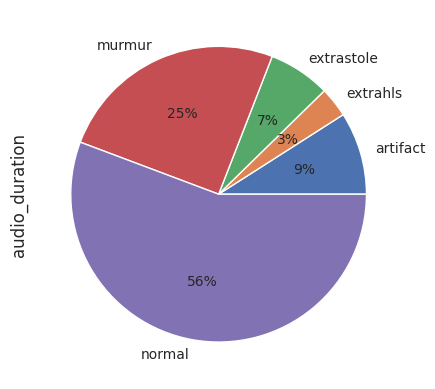

In [17]:
total_train_metadata.groupby('label')["audio_duration"].sum().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10})


# 💠Feature Engineering

In [18]:
# some important functions for feature engineering

def loading_audio_files_increasing_data(filename, set_name):

    if set_name == 'a' :
        data,sr = librosa.load("Data/Set A/audio_files/" + filename, sr=SAMPLE_RATE, offset=0, duration = 3.0)
    elif set_name == 'b' :
        data,sr = librosa.load("Data/Set B/audio_files/" + filename, sr=SAMPLE_RATE, offset=0, duration = 3.0)

    output1 = getting_audio_function(data)
    result = np.array(output1)

    noise_output = noise_generation_function(data)
    output2 = getting_audio_function(noise_output)
    result = np.vstack((result,output2))

    stretch_output = stretch_generation_function(data,0.6)
    stretch_pitch = pitch_generation_function(stretch_output,SAMPLE_RATE)
    output3 = getting_audio_function(stretch_pitch)
    result = np.vstack((result,output3))


    return result

In [19]:
def getting_audio_function(data):

    output_result = np.array([])

    mean_zero_crossing_rate = np.mean(librosa.feature.zero_crossing_rate(y=data).T,axis=0)
    output_result = np.hstack((output_result,mean_zero_crossing_rate))

    stft_output = np.abs(librosa.stft(data))
    chroma_mean = np.mean(librosa.feature.chroma_stft(S=stft_output,sr=SAMPLE_RATE).T,axis=0)
    output_result = np.hstack((output_result,chroma_mean))

    mfcc_output = np.mean(librosa.feature.mfcc(y=data,sr=SAMPLE_RATE).T,axis=0)
    output_result = np.hstack((output_result,mfcc_output))

    root_output = np.mean(librosa.feature.rms(y=data).T,axis=0)
    output_result = np.hstack((output_result,root_output))

    mel_output = np.mean(librosa.feature.melspectrogram(y=data,sr=SAMPLE_RATE).T,axis=0)
    output_result = np.hstack((output_result,mel_output))

    return output_result

In [20]:
def noise_generation_function(data):
    noise_value = 0.009 * np.random.uniform() * np.amax(data)
    data = data + noise_value * np.random.normal(size=data.shape[0])
    return data

def stretch_generation_function(data,rate=0.6):
    return librosa.effects.time_stretch(data,rate=0.6)

def shift_generation_function(data):
    shift_range = int(np.random.uniform(-3,3) * 1000)
    return np.roll(data,shift_range)

def pitch_generation_function(data,SAMPLE_RATE,pitch_factor=0.3):
    return librosa.effects.pitch_shift(data,sr= SAMPLE_RATE,n_steps=pitch_factor)

In [21]:
def y_bin(x):
    y = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        if x[i] != 4:
            y[i] = 1
    return y

In [22]:
def bin_cf_matrix(bin_prob,bin_y):
    y_pred = np.zeros(bin_prob.shape[0])
    for i in range(bin_prob.shape[0]):
        if bin_prob[i,0] > bin_prob[i,1]:
            y_pred[i] = 0
        else:
            y_pred[i] = 1

    return confusion_matrix(bin_y,y_pred)

In [23]:
def bin_prob(x):
    y = np.zeros((x.shape[0],2))
    for i in range(x.shape[0]):
        y[i,1] = np.sum(x[i,:-1])
        y[i,0] = x[i,-1]
    return y

In [24]:
def bin_accuracy_score(x):
    return (x[0,0]+x[1,1])/np.sum(x)

def bin_f1_score(cf):
    precision = cf[1,1]/(cf[1,1]+cf[0,1])
    recall = cf[1,1]/(cf[1,1]+cf[1,0])
    f1_score = (2*precision*recall)/(precision+recall)
    return precision,recall,f1_score

def y_bin_cnn(x):
    y = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        if x[i,-1] != 1:
            y[i] = 1
    return y

In [25]:
x = []
y = []

for index, row in total_train_metadata.iterrows():
        wav_features = loading_audio_files_increasing_data(row['fname'],row['dataset'])
        for indexing in wav_features:
            x.append(indexing)
            y.append(row['label'])

In [26]:
print(len(y))
print(len(x))

1755
1755


## 🔸Understanding new features in data generated above

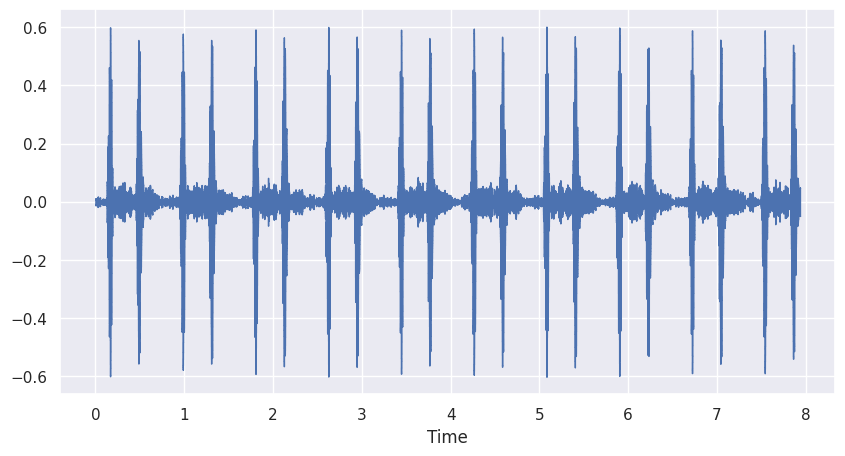

In [27]:
# plain simple audio

figure = plt.figure(figsize=(10,5))
librosa.display.waveshow(total_train_metadata["time_series"][80])

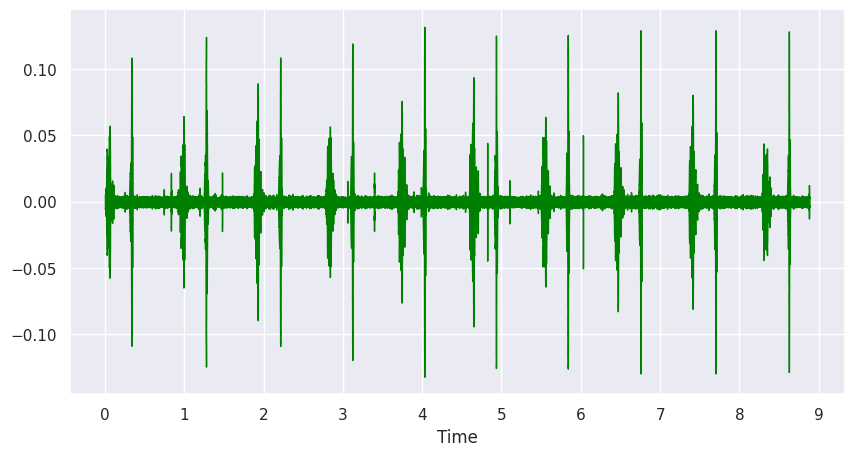

In [28]:
# audio with added noise

figure = plt.figure(figsize=(10,5))
# data,sample_rate = librosa.load(data,duration=3.0)
data=total_train_metadata["time_series"][60]
noise_value = 0.02 * np.random.uniform() * np.amax(data)
data = data + noise_value * np.random.normal(size=data.shape[0])
librosa.display.waveshow(data,sr=SAMPLE_RATE, color='green')

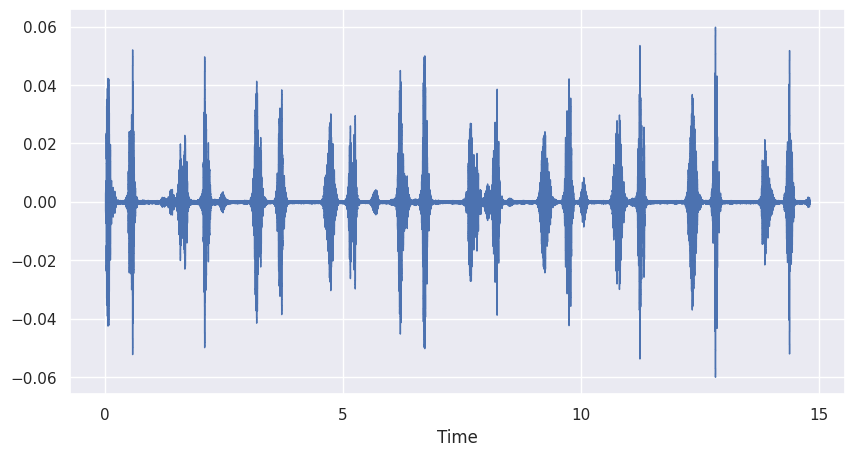

In [29]:
# audio with added noise and stretch, we can see the audio becomes distorted

figure = plt.figure(figsize=(10,5))
# data,sample_rate = librosa.load(total_train_metadata["time_series"][77],duration=3.0)
data=total_train_metadata["time_series"][60]
data = pitch_generation_function(stretch_generation_function(data), SAMPLE_RATE)
librosa.display.waveshow(data,sr=SAMPLE_RATE)

### <u> Encoding + Transforming for CNN

**Using One hot encoding for CNN**

In [30]:
train_df = pd.DataFrame(x)
train_df["category"] = y

train_df.to_csv("train_df.csv",index=False)
train_df

,0,1,2,3,4,5,6,7,8,9,...,153,154,155,156,157,158,159,160,161,category
0,0.301029,0.850736,0.836792,0.833259,0.834729,0.831498,0.833262,0.829891,0.819718,0.818701,...,6.339757e-06,6.157199e-06,5.180164e-06,4.195213e-06,3.722824e-06,2.819821e-06,2.368681e-06,1.121509e-06,1.024807e-07,artifact
1,0.430011,0.879276,0.909041,0.923590,0.934139,0.902671,0.788353,0.789921,0.794315,0.807669,...,1.489062e-04,1.481382e-04,1.429291e-04,1.451849e-04,1.504484e-04,1.423624e-04,1.420729e-04,1.448348e-04,1.395878e-04,artifact
2,0.200062,0.819896,0.785629,0.786149,0.794678,0.759954,0.747108,0.813400,0.816036,0.783515,...,1.464175e-06,1.385579e-06,1.174237e-06,1.104357e-06,9.444987e-07,8.194442e-07,5.931280e-07,3.119416e-07,1.378349e-08,artifact
3,0.739126,0.861922,0.922210,0.962124,0.974906,0.759760,0.461550,0.478312,0.538435,0.606839,...,8.471805e-09,8.751478e-09,9.196658e-09,8.524148e-09,8.752641e-09,8.733966e-09,7.854172e-09,4.251705e-09,3.304616e-10,artifact
4,0.739156,0.861922,0.922208,0.962125,0.974906,0.759770,0.461575,0.478307,0.538439,0.606844,...,8.471853e-09,8.751513e-09,9.196765e-09,8.524196e-09,8.752683e-09,8.734074e-09,7.854202e-09,4.251870e-09,3.304574e-10,artifact
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1750,0.029030,0.834933,0.831091,0.817758,0.821019,0.865255,0.860199,0.804033,0.788107,0.798330,...,1.330324e-04,1.290144e-04,1.352779e-04,1.321574e-04,1.348378e-04,1.328218e-04,1.406555e-04,1.354339e-04,1.343081e-04,normal
1751,0.024202,0.741898,0.694919,0.731266,0.767010,0.775904,0.818769,0.789316,0.758636,0.733023,...,9.380850e-08,7.565115e-08,7.981822e-08,9.350476e-08,5.334526e-08,6.332046e-08,6.213346e-08,2.351137e-08,1.891540e-09,normal
1752,0.019332,0.829895,0.812873,0.811829,0.788721,0.777398,0.796602,0.794476,0.829561,0.833659,...,1.615253e-07,1.576406e-07,1.543805e-07,1.514352e-07,1.488635e-07,1.467984e-07,1.451028e-07,1.439343e-07,1.431396e-07,normal
1753,0.088608,0.879031,0.872422,0.866833,0.856236,0.845829,0.814421,0.780074,0.790852,0.822791,...,2.127040e-03,2.314196e-03,2.244426e-03,2.176760e-03,2.221361e-03,2.204908e-03,2.207354e-03,2.139645e-03,2.282220e-03,normal


In [31]:
Encoder_Function = OneHotEncoder()
Scaler_Function = MinMaxScaler()

In [32]:
X = train_df.iloc[:,:-1].values
y = train_df["category"].values

In [33]:
print(X.shape)
print(y.shape)


(1755, 162)
(1755,)


In [34]:
y_cnn = Encoder_Function.fit_transform(np.array(y).reshape(-1,1)).toarray()
y_cnn

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]])

In [35]:
cnnreference_df = pd.DataFrame()
cnnreference_df['Actual'] = train_df["category"].values
cnnreference_df['Encoded'] = [''.join(str(y_cnn[i,:].tolist())) for i in range(y_cnn.shape[0])]
cnnreference_df.drop_duplicates()

y_cnn.shape

(1755, 5)

In [36]:
# splitting the data

x_train_cnn,x_test_cnn,y_train_cnn,y_test_cnn = train_test_split(X,y_cnn,train_size=0.8,random_state=42,shuffle=True)

In [37]:
print("x_train_cnn.shape - ", x_train_cnn.shape)
print("y_train_cnn.shape - ",y_train_cnn.shape)
print("x_test_cnn.shape  - ",x_test_cnn.shape)
print("y_test_cnn.shape  - ",y_test_cnn.shape)


x_train_cnn.shape -  (1404, 162)
y_train_cnn.shape -  (1404, 5)
x_test_cnn.shape  -  (351, 162)
y_test_cnn.shape  -  (351, 5)


In [38]:
x_train_cnn = np.expand_dims(x_train_cnn,axis=2)
x_test_cnn = np.expand_dims(x_test_cnn,axis=2)

print(x_train_cnn.shape)
print(x_test_cnn.shape)

(1404, 162, 1)
(351, 162, 1)


In [39]:
# setting the right parameters for implementing CNN

output_dim = 5
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
input_shape_dim = (x_train_cnn.shape[1],1)

input_shape_dim

(162, 1)

In [40]:
input_shape_dim = (162,1)

output_dim = 5

# 💠<u>Models

## 🔸CNN Conv1D

In [41]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [42]:
# setting the layers for our CNN model

Model = Sequential()

Model.add(Conv1D(256,5,strides=1,padding="same",activation="relu",input_shape=(input_shape_dim)))
Model.add(BatchNormalization())
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(256,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(128,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Conv1D(64,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(32,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Flatten())
Model.add(Dense(1024, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=output_dim, activation='softmax'))

In [43]:
print(Model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 162, 256)          1536      
                                                                 
 batch_normalization (BatchN  (None, 162, 256)         1024      
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 81, 256)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 81, 256)           262400    
                                                                 
 dropout (Dropout)           (None, 81, 256)           0         
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 41, 256)          0

In [44]:
Model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [45]:
Conv1D_Model = Model.fit(x_train_cnn, y_train_cnn,
                         epochs=70,
                                validation_data=(x_test_cnn, y_test_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/70
44/44 [==============================] - 12s 249ms/step - loss: 1.5163 - accuracy: 0.5321 - val_loss: 1.3939 - val_accuracy: 0.5954
Epoch 2/70
44/44 [==============================] - 10s 239ms/step - loss: 1.2020 - accuracy: 0.6033 - val_loss: 1.3637 - val_accuracy: 0.3789
Epoch 3/70
44/44 [==============================] - 8s 189ms/step - loss: 1.1474 - accuracy: 0.6054 - val_loss: 1.2537 - val_accuracy: 0.6068
Epoch 4/70
44/44 [==============================] - 10s 237ms/step - loss: 1.0763 - accuracy: 0.6090 - val_loss: 1.1331 - val_accuracy: 0.5869
Epoch 5/70
44/44 [==============================] - 10s 239ms/step - loss: 0.9957 - accuracy: 0.6332 - val_loss: 1.0545 - val_accuracy: 0.6040
Epoch 6/70
44/44 [==============================] - 9s 198ms/step - loss: 0.9648 - accuracy: 0.6346 - val_loss: 1.0611 - val_accuracy: 0.6268
Epoch 7/70
44/44 [==============================] - 13s 305ms/step - loss: 0.8843 - accuracy: 0.6603 - val_loss: 0.9965 - val_accuracy: 0.6353
E

In [46]:
Model_Results = Model.evaluate(x_test_cnn,y_test_cnn)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

11/11 [==============================] - 1s 66ms/step - loss: 0.7892 - accuracy: 0.6952
LOSS:  0.7892
ACCURACY:  0.6952


In [47]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

y_pred_proba_test_CNN = bin_prob(Model.predict(x_test_cnn))[::,1]
fpr_test_CNN, tpr_test_CNN, _ = roc_curve(y_bin_cnn(y_test_cnn),  y_pred_proba_test_CNN)
roc_auc_test_CNN = auc(fpr_test_CNN, tpr_test_CNN)
precision_test_CNN, recall_test_CNN, thresholds_test_CNN = precision_recall_curve(y_bin_cnn(y_test_cnn),y_pred_proba_test_CNN)

11/11 [==============================] - 1s 67ms/step


In [48]:
indexes_predict = tf.argmax(Model.predict(x_test_cnn), axis=1)
indexes_actual = tf.argmax(y_test_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

11/11 [==============================] - 1s 51ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 19,   0,   0,   0,   2],
       [  0,   0,   0,   0,   9],
       [  0,   0,   0,   0,  37],
       [  0,   0,   0,  32,  49],
       [  2,   0,   0,   8, 193]], dtype=int32)>

In [49]:
label_names = ['artifact','extrahls','extrastole','murmur','normal']

11/11 [==============================] - 0s 37ms/step


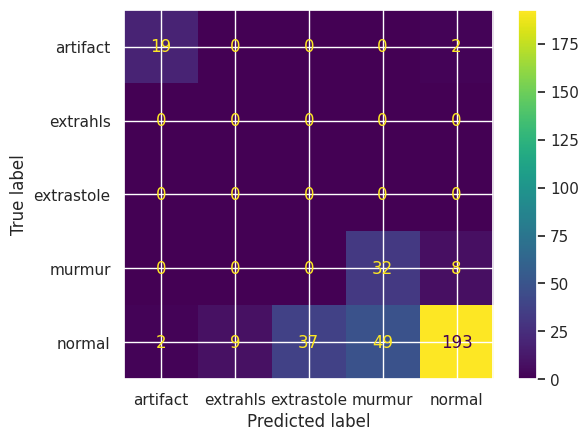

In [50]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

cm_cnn=confusion_matrix(Model.predict(x_test_cnn).argmax(axis=1),y_test_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels = label_names)
disp.plot()
plt.show()

In [51]:
label_names_bin = ['normal','abnormal']

11/11 [==============================] - 0s 38ms/step


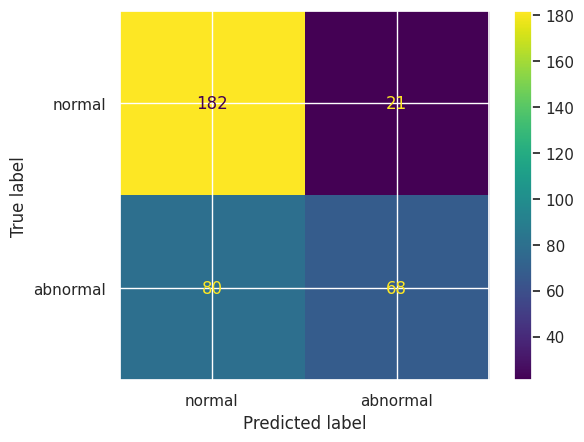

In [52]:
cm_cnn_bin = bin_cf_matrix(bin_prob(Model.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

**Accuracy**

In [53]:

bin_accuracy_score(bin_cf_matrix(bin_prob(Model.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 36ms/step


0.7122507122507122

In [54]:
bin_f1_score(bin_cf_matrix(bin_prob(Model.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 38ms/step


(0.7640449438202247, 0.4594594594594595, 0.5738396624472574)

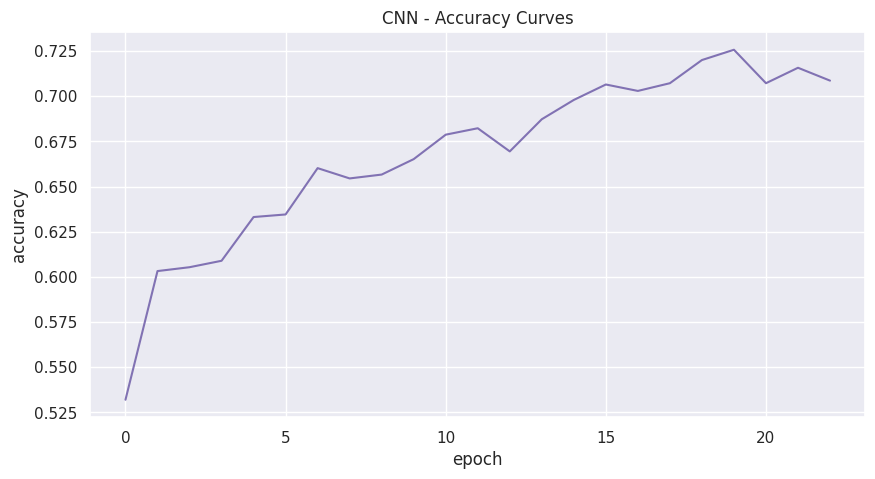

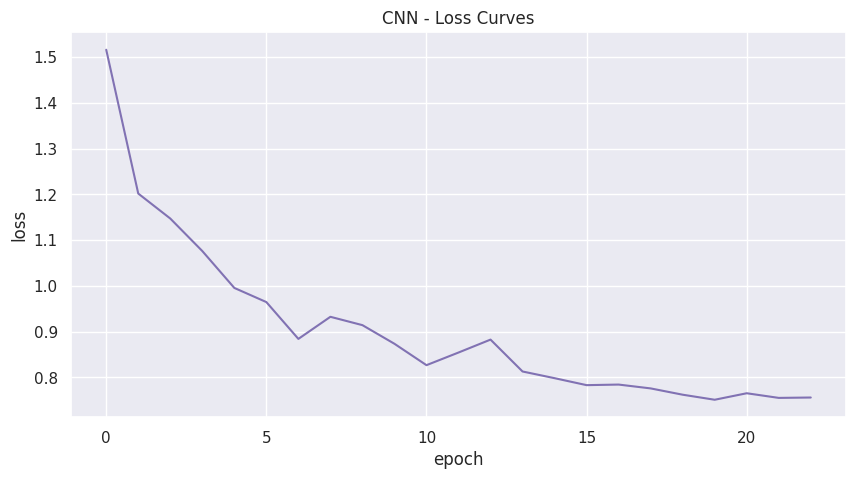

In [55]:
accuracy = Conv1D_Model.history['accuracy']
loss = Conv1D_Model.history['loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## 🔸CNN1D Experiment

In [56]:
Model_2 = Sequential()

#Model_2.add(Conv1D(256,5,strides=1,padding="causal",activation="tanh",input_shape=input_shape_dim))
Model_2.add(Conv1D(256,5,strides=1,padding="causal",activation = 'tanh',input_shape=input_shape_dim))
Model_2.add(BatchNormalization())
Model_2.add(MaxPooling1D(3,strides=2,padding="same"))

Model_2.add(Dense(64, activation='tanh'))

Model_2.add(Flatten())
Model_2.add(Dense(1024, activation='relu'))
Model_2.add(Dropout(0.3))

Model_2.add(Dense(units=output_dim, activation='softmax'))

In [57]:
print(Model_2.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 batch_normalization_1 (Batc  (None, 162, 256)         1024      
 hNormalization)                                                 
                                                                 
 max_pooling1d_5 (MaxPooling  (None, 81, 256)          0         
 1D)                                                             
                                                                 
 dense_2 (Dense)             (None, 81, 64)            16448     
                                                                 
 flatten_1 (Flatten)         (None, 5184)              0         
                                                                 
 dense_3 (Dense)             (None, 1024)             

In [58]:
Model_2.compile(loss='mse', optimizer='adam')
Conv1D_Model_2 = Model_2.fit(x_train_cnn, y_train_cnn,
                         epochs=70,
                                validation_data=(x_test_cnn, y_test_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/70
44/44 [==============================] - ETA: 0s - loss: 0.1398

44/44 [==============================] - 9s 172ms/step - loss: 0.1398 - val_loss: 0.1509
Epoch 2/70
44/44 [==============================] - ETA: 0s - loss: 0.1376

44/44 [==============================] - 6s 137ms/step - loss: 0.1376 - val_loss: 0.1490
Epoch 3/70
44/44 [==============================] - ETA: 0s - loss: 0.1352

44/44 [==============================] - 6s 140ms/step - loss: 0.1352 - val_loss: 0.1498
Epoch 4/70
44/44 [==============================] - ETA: 0s - loss: 0.1347

44/44 [==============================] - 7s 150ms/step - loss: 0.1347 - val_loss: 0.1471
Epoch 5/70
44/44 [==============================] - ETA: 0s - loss: 0.1337

44/44 [==============================] - 6s 126ms/step - loss: 0.1337 - val_loss: 0.1474
Epoch 6/70
44/44 [==============================] - ETA: 0s - loss: 0.1330

44/44 [==============================] - 7s 166ms/step - loss: 0.1330 - val_loss: 0.1470
Epoch 7/70
44/44 [==============================] - ETA: 0s - loss: 0.1327

44/44 [==============================] - 6s 131ms/step - loss: 0.1327 - val_loss: 0.1466
Epoch 8/70
44/44 [==============================] - ETA: 0s - loss: 0.1345

44/44 [==============================] - 7s 168ms/step - loss: 0.1345 - val_loss: 0.1481
Epoch 9/70
44/44 [==============================] - ETA: 0s - loss: 0.1385

44/44 [==============================] - 5s 124ms/step - loss: 0.1385 - val_loss: 0.1503
Epoch 10/70
44/44 [==============================] - ETA: 0s - loss: 0.1323

44/44 [==============================] - 7s 149ms/step - loss: 0.1323 - val_loss: 0.1504
Epoch 11/70
44/44 [==============================] - ETA: 0s - loss: 0.1361

44/44 [==============================] - 6s 143ms/step - loss: 0.1361 - val_loss: 0.1470
Epoch 12/70
44/44 [==============================] - ETA: 0s - loss: 0.1316

44/44 [==============================] - 6s 136ms/step - loss: 0.1316 - val_loss: 0.1481
Epoch 13/70
44/44 [==============================] - ETA: 0s - loss: 0.1332

44/44 [==============================] - 7s 161ms/step - loss: 0.1332 - val_loss: 0.1481
Epoch 14/70
44/44 [==============================] - ETA: 0s - loss: 0.1347

44/44 [==============================] - 6s 130ms/step - loss: 0.1347 - val_loss: 0.1481
Epoch 15/70
44/44 [==============================] - ETA: 0s - loss: 0.1338

44/44 [==============================] - 7s 165ms/step - loss: 0.1338 - val_loss: 0.1516


In [59]:
Model_Results_2 = Model_2.evaluate(x_test_cnn,y_test_cnn)
print(Model_Results_2)                                                  # chcek again giving wrong results
print("LOSS:  " + "%.4f" % Model_Results_2)
print("ACCURACY:  " + "%.4f" % Model_Results_2)

# Model_Results_2 = Model_2.evaluate(x_test_cnn,y_test_cnn)
# print("LOSS:  " + "%.4f" % Model_Results_2[0])
# print("ACCURACY:  " + "%.4f" % Model_Results_2[1])

11/11 [==============================] - 0s 20ms/step - loss: 0.1516
0.15156695246696472
LOSS:  0.1516
ACCURACY:  0.1516


In [60]:
indexes_predict = tf.argmax(Model_2.predict(x_test_cnn), axis=1)
indexes_actual = tf.argmax(y_test_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

11/11 [==============================] - 0s 21ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 17,   0,   0,   0,   4],
       [  0,   0,   0,   0,   9],
       [  0,   0,   0,   0,  37],
       [  0,   0,   0,   0,  81],
       [  2,   0,   0,   0, 201]], dtype=int32)>

In [61]:
bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))

11/11 [==============================] - 0s 34ms/step


array([[201,   2],
       [131,  17]])

11/11 [==============================] - 0s 35ms/step


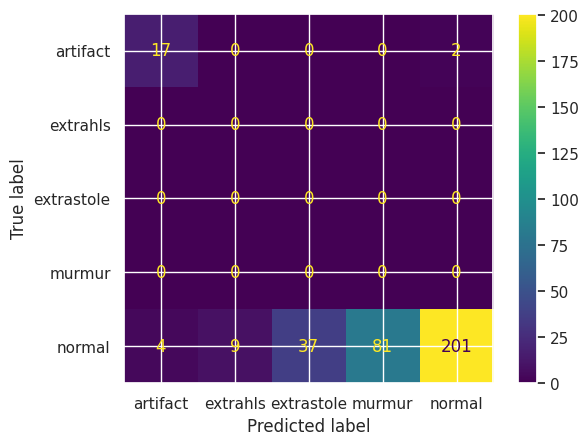

In [62]:
cm_cnn2=confusion_matrix(Model_2.predict(x_test_cnn).argmax(axis=1),y_test_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2, display_labels = label_names)
disp.plot()
plt.show()

11/11 [==============================] - 0s 34ms/step


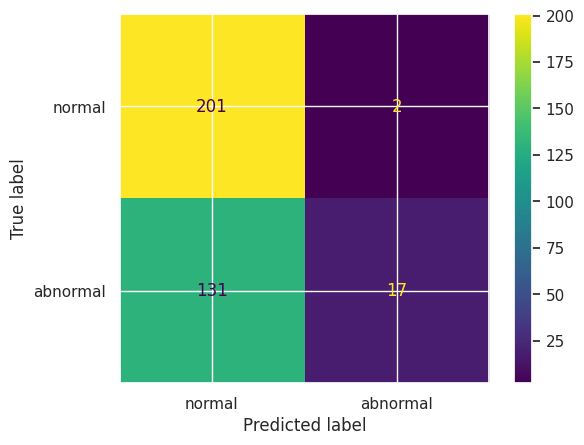

In [63]:
cm_cnn2_bin = bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [64]:
bin_accuracy_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 36ms/step


0.6210826210826211

In [65]:
bin_f1_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn)))

11/11 [==============================] - 0s 31ms/step


(0.8947368421052632, 0.11486486486486487, 0.2035928143712575)

In [66]:
y_pred_proba_test_CNN2 = bin_prob(Model_2.predict(x_test_cnn))[::,1]
fpr_test_CNN2, tpr_test_CNN2, _ = roc_curve(y_bin_cnn(y_test_cnn),  y_pred_proba_test_CNN2)
roc_auc_test_CNN2 = auc(fpr_test_CNN2, tpr_test_CNN2)
precision_test_CNN2, recall_test_CNN2, thresholds_test_CNN2 = precision_recall_curve(y_bin_cnn(y_test_cnn),y_pred_proba_test_CNN2)

11/11 [==============================] - 0s 20ms/step


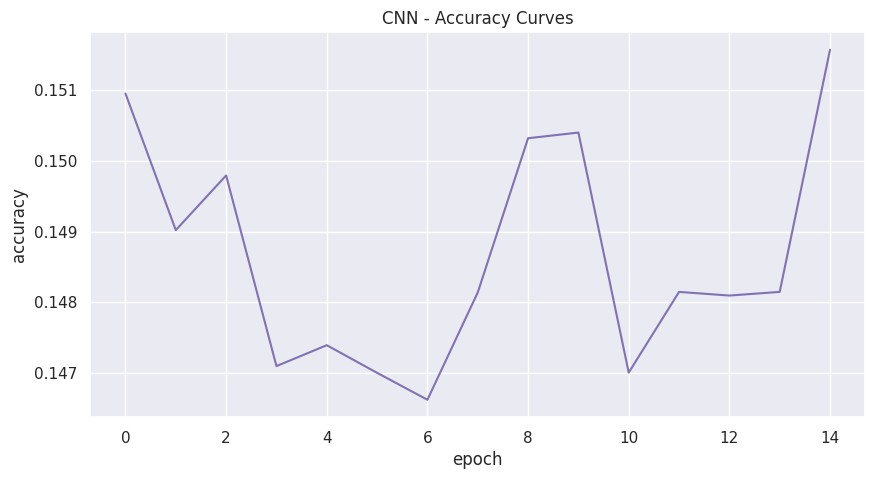

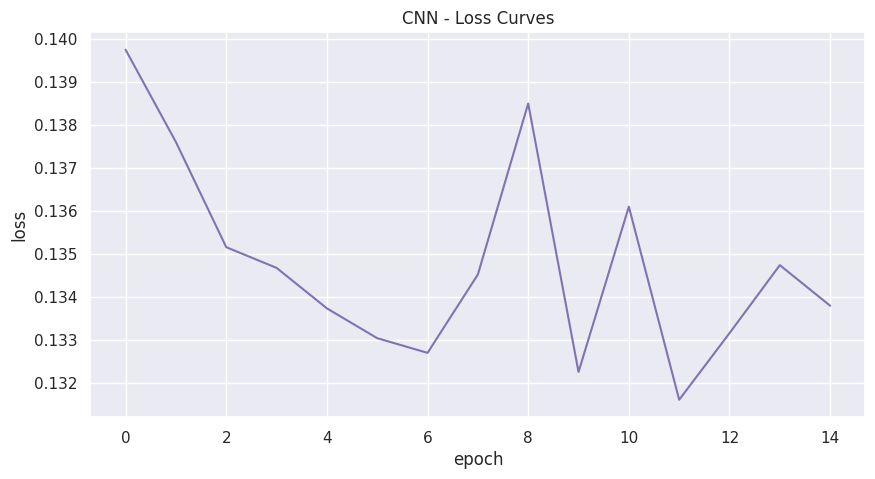

In [67]:
from keras.callbacks import History


# accuracy = Model_2.history['accuracy']
# loss = Model_2.history['loss']                # // wrong results


loss = Conv1D_Model_2.history['loss']
accuracy = Conv1D_Model_2.history['val_loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## 🔹 Rest of the models

In [68]:
y = train_df["category"].values
Label_Encode = LabelEncoder()
y = Label_Encode.fit_transform(y)

In [69]:
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=42,shuffle=True)

In [70]:
reference_df = pd.DataFrame()
reference_df['Actual'] = train_df["category"].values
reference_df['Encoded'] = y
reference_df.drop_duplicates()

,Actual,Encoded
0,artifact,0
120,extrahls,1
177,murmur,3
279,normal,4
372,extrastole,2


In [71]:
x_train = Scaler_Function.fit_transform(x_train)
x_test = Scaler_Function.fit_transform(x_test)

In [72]:
print(x_train.shape)
print(x_test.shape)

(1404, 162)
(351, 162)


## 🔸RandomForest Classifier

In [73]:
print(x_train.shape)
print(x_test.shape)

(1404, 162)
(351, 162)


In [74]:
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100, 200, 300, 400, 500],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
clf_rfGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_rfGCV = clf_rfGCV.fit(x_train, y_train)
print(clf_rfGCV.best_params_)

{'criterion': 'gini', 'max_features': 10, 'n_estimators': 200, 'random_state': 17}


In [75]:
print('Accuracy Score: ',accuracy_score(y_test,clf_rfGCV.predict(x_test)))

Accuracy Score:  0.717948717948718


In [76]:
print(confusion_matrix(y_test,clf_rfGCV.predict(x_test)))
print(bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test)))

[[ 21   0   0   0   0]
 [  0   0   0   0   9]
 [  0   0   0   1  36]
 [  1   1   0  41  38]
 [  3   0   0  10 190]]
[[ 89 114]
 [ 25 123]]


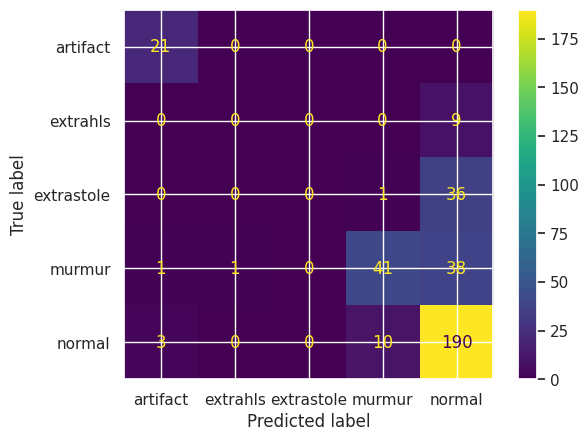

In [77]:
cm_rf=confusion_matrix(y_test,clf_rfGCV.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels = label_names)
disp.plot()
plt.show()

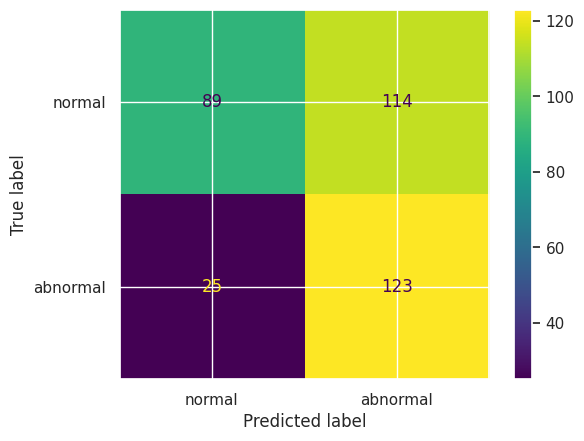

In [78]:
cm_rf_bin=bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [79]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test))))

0.603988603988604


In [80]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test))))

(0.5189873417721519, 0.831081081081081, 0.638961038961039)


In [81]:
y_pred_proba_test_rf = bin_prob(clf_rfGCV.predict_proba(x_test))[::,1]
fpr_test_rf, tpr_test_rf, _ = roc_curve(y_bin(y_test),  y_pred_proba_test_rf)
roc_auc_test_rf = auc(fpr_test_rf, tpr_test_rf)
precision_test_rf, recall_test_rf, thresholds_test_rf = precision_recall_curve(y_bin(y_test),y_pred_proba_test_rf)

## 🔸 LGBMBoosting Classifier

In [82]:
clf = LGBMClassifier()

param_grid = {"n_estimators": [100,500,600,700],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
clf_XGBGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_XGBGCV = clf_XGBGCV.fit(x_train, y_train)
print(clf_XGBGCV.best_params_)

filterwarnings("ignore")

{'learning_rate': 0.1, 'n_estimators': 600, 'random_state': 17}


In [83]:
print('Accuracy Score: ',accuracy_score(y_test,clf_XGBGCV.predict(x_test)))

Accuracy Score:  0.6410256410256411


In [84]:
y_pred_proba_test_XGB = bin_prob(clf_XGBGCV.predict_proba(x_test))[::,1]
fpr_test_XGB, tpr_test_XGB, _ = roc_curve(y_bin(y_test),  y_pred_proba_test_XGB)
roc_auc_test_XGB = auc(fpr_test_XGB, tpr_test_XGB)
precision_test_XGB, recall_test_XGB, thresholds_test_XGB = precision_recall_curve(y_bin(y_test),y_pred_proba_test_XGB)

In [85]:
print(confusion_matrix(y_test,clf_XGBGCV.predict(x_test)))

print(bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test)))

[[ 21   0   0   0   0]
 [  1   0   0   2   6]
 [  0   0   4   8  25]
 [  1   0   0  60  20]
 [  4   0   2  57 140]]
[[137  66]
 [ 49  99]]


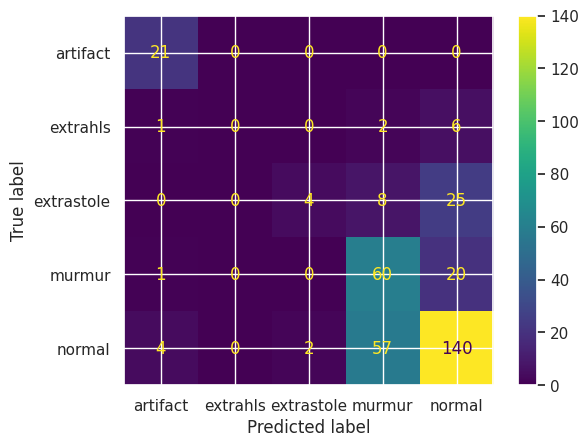

In [86]:
cm_XGB=confusion_matrix(y_test,clf_XGBGCV.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB, display_labels = label_names)
disp.plot()
plt.show()

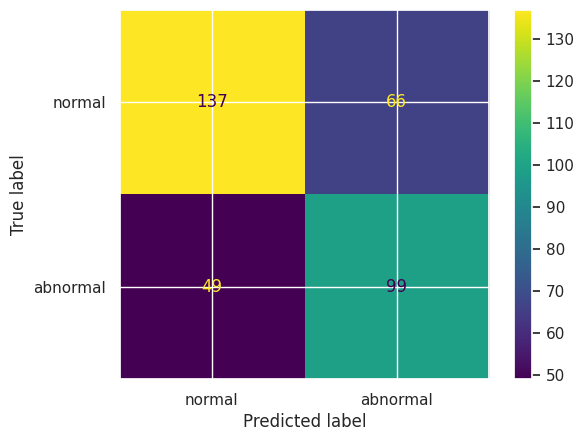

In [87]:
cm_XGB_bin=bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [88]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test))))

0.6723646723646723


In [89]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test))))

(0.6, 0.668918918918919, 0.6325878594249201)


## 🔸CatBoost

In [90]:
clf = CatBoostClassifier(verbose=False)

param_grid = {'learning_rate': [0.03, 0.1],
        'depth': [4, 6],
        'l2_leaf_reg': [0.05,0.5,1],
        "random_state": [17]
       }

# Grid search
clf_CBGCV = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_CBGCV = clf_CBGCV.fit(x_train, y_train)
print(clf_CBGCV.best_params_)

filterwarnings("ignore")

{'depth': 4, 'l2_leaf_reg': 0.05, 'learning_rate': 0.1, 'random_state': 17}


In [91]:
print('Accuracy Score: ',accuracy_score(y_test,clf_CBGCV.predict(x_test)))
#print('AUC Score: ',roc_auc_score(y_test,clf_CBGCV.best_estimator_.predict_proba(X_test)[:,1]))
#print('F1 Score: ',f1_score(y_test,clf_CBGCV.predict(x_test), average = None))

Accuracy Score:  0.6125356125356125


In [92]:
print(confusion_matrix(y_test,clf_CBGCV.predict(x_test)))

print(bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test)))

[[ 21   0   0   0   0]
 [  0   0   0   2   7]
 [  0   0   0  16  21]
 [  1   0   0  59  21]
 [  4   0   0  64 135]]
[[132  71]
 [ 47 101]]


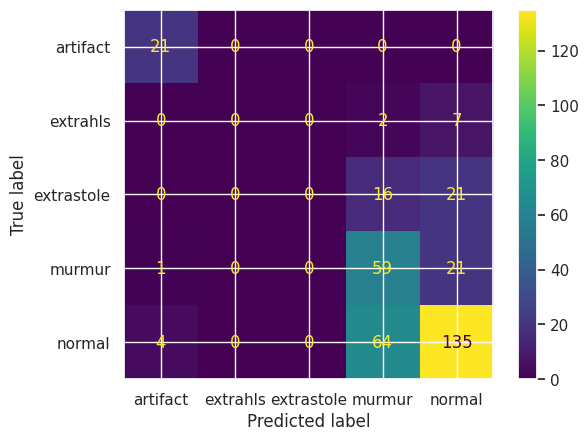

In [93]:
cm_CB=confusion_matrix(y_test,clf_CBGCV.predict(x_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_CB, display_labels = label_names)
disp.plot()
plt.show()

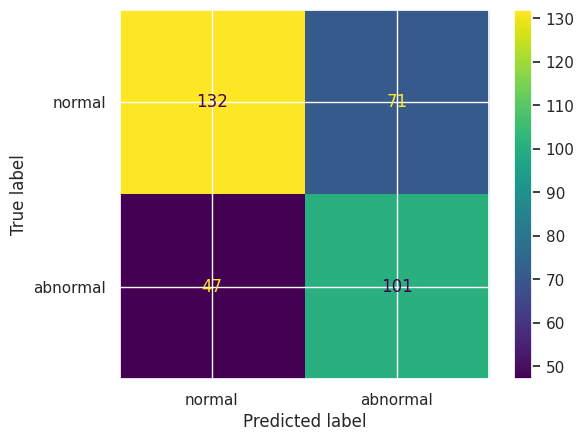

In [94]:
cm_CB_bin=bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_CB_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [95]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test))))

0.6638176638176638


In [96]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test))))

(0.5872093023255814, 0.6824324324324325, 0.63125)


In [97]:
y_pred_proba_test_CB = bin_prob(clf_CBGCV.predict_proba(x_test))[::,1]
fpr_test_CB, tpr_test_CB, _ = roc_curve(y_bin(y_test),  y_pred_proba_test_CB)
roc_auc_test_CB = auc(fpr_test_CB, tpr_test_CB)
precision_test_CB, recall_test_CB, thresholds_test_CB = precision_recall_curve(y_bin(y_test),y_pred_proba_test_CB)

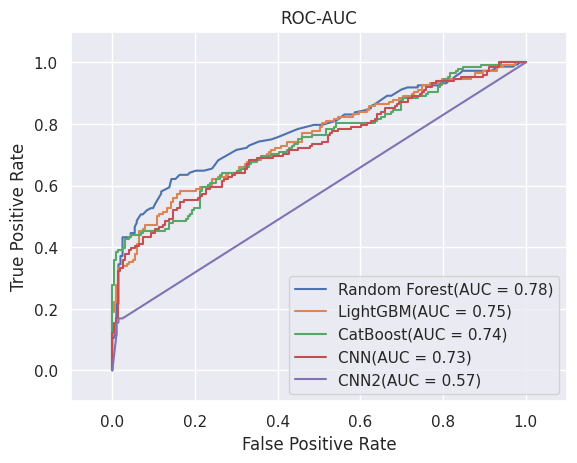

In [98]:
# Plot ROC curves

plt.plot(fpr_test_rf, tpr_test_rf)
plt.plot(fpr_test_XGB, tpr_test_XGB)
plt.plot(fpr_test_CB, tpr_test_CB)
plt.plot(fpr_test_CNN, tpr_test_CNN)
plt.plot(fpr_test_CNN2, tpr_test_CNN2)
plt.legend(['Random Forest(AUC = ' + str(round(roc_auc_test_rf,2))+')'\
            ,'LightGBM(AUC = ' + str(round(roc_auc_test_XGB,2))+')'\
            ,'CatBoost(AUC = ' + str(round(roc_auc_test_CB,2))+')'\
            ,'CNN(AUC = ' + str(round(roc_auc_test_CNN,2))+')'\
            ,'CNN2(AUC = ' + str(round(roc_auc_test_CNN2,2))+')'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

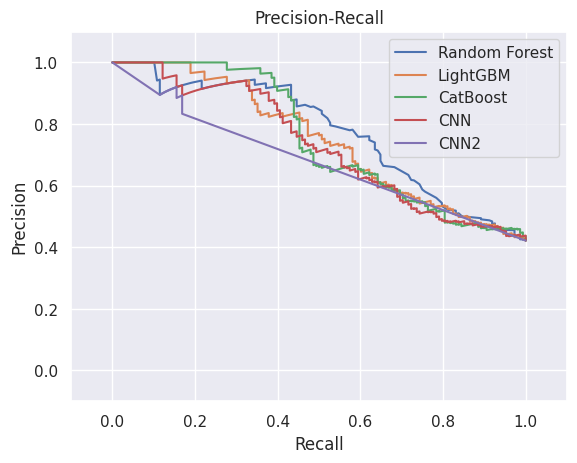

In [99]:
plt.plot(recall_test_rf, precision_test_rf)
plt.plot(recall_test_XGB, precision_test_XGB)
plt.plot(recall_test_CB, precision_test_CB)
plt.plot(recall_test_CNN, precision_test_CNN)
plt.plot(recall_test_CNN2, precision_test_CNN2)
plt.legend(['Random Forest', 'LightGBM','CatBoost','CNN','CNN2'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

# 💠Implementing all models again after treating class imbalance

## 🔸Treating Class Imbalance

In [111]:
training_df = train_df.sample(frac = 0.8)
testing_df = train_df.drop(training_df.index)

# print(training_df.shape)
# print(testing_df.shape)
print(training_df)

             0         1         2         3         4         5         6  \
1627  0.038706  0.841616  0.834007  0.829239  0.864096  0.882433  0.844987   
820   0.086415  0.864572  0.872927  0.897246  0.911632  0.924755  0.902831   
605   0.021050  0.739889  0.785387  0.711716  0.681944  0.695832  0.682279   
549   0.020955  0.773786  0.780597  0.803810  0.827168  0.836923  0.815221   
589   0.018489  0.699988  0.758537  0.790654  0.835402  0.858291  0.851761   
...        ...       ...       ...       ...       ...       ...       ...   
1386  0.012699  0.726359  0.715089  0.731030  0.750567  0.765760  0.795514   
570   0.022474  0.736099  0.747771  0.765815  0.740149  0.761852  0.788789   
1278  0.016663  0.776768  0.797721  0.865140  0.841068  0.829596  0.804377   
639   0.016301  0.768692  0.737444  0.768287  0.815851  0.836855  0.837656   
1622  0.009700  0.680351  0.696998  0.713464  0.749306  0.793367  0.819053   

             7         8         9  ...           153          

In [114]:
# handling class imbalance by declaring majority and minority classes

# train_df_majority = training_df["normal"] #training_df.lable=="normal"]
# train_df_murmur = training_df["murmur"]  #training_df.label=="murmur"]
# train_df_extrastole = training_df["extrastole"]  #training_df.label=="extrastole"]
# train_df_extrahls = training_df["extrahls"]  #training_df.label=="extrahls"]
# train_df_artifact = training_df["artifact"]  #training_df.label=="artifact"]

train_df_majority = training_df[training_df.category =="normal"]
train_df_murmur = training_df[training_df.category=="murmur"]
train_df_extrastole = training_df[training_df.category=="extrastole"]
train_df_extrahls = training_df[training_df.category=="extrahls"]
train_df_artifact = training_df[training_df.category=="artifact"]

print(training_df.shape)
print(testing_df.shape)

print(train_df_artifact.shape)
print(train_df_murmur.shape)
print(train_df_extrastole.shape)
print(train_df_extrahls.shape)
print(train_df_majority.shape)

(1404, 163)
(351, 163)
(99, 163)
(310, 163)
(114, 163)
(43, 163)
(838, 163)


In [115]:
majority_number = len(train_df_majority)

# upsample the minority classes
df_minority1_upsampled = resample(train_df_murmur,
                                 replace=True,
                                 n_samples=majority_number,
                                 random_state=42)

df_minority2_upsampled = resample(train_df_extrastole,
                                 replace=True,
                                 n_samples=majority_number,
                                 random_state=42)

df_minority3_upsampled = resample(train_df_extrahls,
                                 replace=True,
                                 n_samples=majority_number,
                                 random_state=42)

df_minority4_upsampled = resample(train_df_artifact,
                                 replace=True,
                                 n_samples=majority_number,
                                 random_state=42)

print(df_minority1_upsampled.shape)
print(df_minority2_upsampled.shape)
print(df_minority3_upsampled.shape)
print(df_minority4_upsampled.shape)

(838, 163)
(838, 163)
(838, 163)
(838, 163)


In [116]:
# combine majority class with the upsampled minority classes

df_upsampled = pd.concat([train_df_majority,
                          df_minority1_upsampled,
                          df_minority2_upsampled,
                          df_minority3_upsampled,
                        df_minority4_upsampled],
                         ignore_index=False)

print(df_upsampled.shape)

(4190, 163)


In [118]:
df_upsampled.category.value_counts()   #// check

normal        838
murmur        838
extrastole    838
extrahls      838
artifact      838
Name: category, dtype: int64

In [122]:
training_df.category.value_counts()
print("===============================")
print(df_upsampled)

             0         1         2         3         4         5         6  \
1627  0.038706  0.841616  0.834007  0.829239  0.864096  0.882433  0.844987   
820   0.086415  0.864572  0.872927  0.897246  0.911632  0.924755  0.902831   
1279  0.122938  0.883472  0.901264  0.926876  0.922204  0.919928  0.844549   
1592  0.019364  0.667985  0.723949  0.726928  0.779049  0.810460  0.802777   
951   0.024553  0.617503  0.659975  0.765922  0.897758  0.867435  0.746313   
...        ...       ...       ...       ...       ...       ...       ...   
60    0.191083  0.894423  0.893537  0.903818  0.900741  0.895584  0.852730   
111   0.161182  0.792679  0.756592  0.781488  0.818643  0.847183  0.838377   
78    0.738706  0.850910  0.921033  0.958064  0.974702  0.758972  0.457949   
75    0.025879  0.619624  0.561030  0.590065  0.728373  0.984578  0.909637   
29    0.241918  0.789323  0.784347  0.842958  0.876028  0.843703  0.844014   

             7         8         9  ...           153          

In [127]:
#class distribution after upsampling is done

# df_upsampled.groupby('category')['normal'].sum().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10})

# df_upsampled.groupby('label')["audio_duration"].sum().plot(kind='pie', autopct='%1.0f%%', textprops={'fontsize': 10})   // check

In [129]:
#### Transforming and Encoding for CNN again using One Hot Encoding

Encoder_Function = OneHotEncoder()
Scaler_Function = MinMaxScaler()

# df_upsampled.shape

x_train_re = df_upsampled.iloc[:, :-1].values
y_train_re = df_upsampled["category"].values

x_test_re = testing_df.iloc[:,:-1].values
y_test_re = testing_df["category"].values

print(x_train_re.shape)
print(y_train_re.shape)
print(x_test_re.shape)
print(y_test_re.shape)

(4190, 162)
(4190,)
(351, 162)
(351,)


## 🔸Transforming and Encoding for CNN again using One Hot Encoding

In [130]:
y_train_re_cnn = Encoder_Function.fit_transform(np.array(y_train_re).reshape(-1,1)).toarray()
y_test_re_cnn = Encoder_Function.transform(np.array(y_test_re).reshape(-1,1)).toarray()

In [131]:
x_train_re_cnn = np.expand_dims(x_train_re,axis=2)
x_test_re_cnn = np.expand_dims(x_test_re,axis=2)

In [132]:
print(x_train_re_cnn.shape)
print(y_train_re_cnn.shape)
print(x_test_re_cnn.shape)
print(y_test_re_cnn.shape)

(4190, 162, 1)
(4190, 5)
(351, 162, 1)
(351, 5)


In [133]:
cnnreference_df_re = pd.DataFrame()
cnnreference_df_re['Actual'] = df_upsampled["category"].values
cnnreference_df_re['Encoded'] = [''.join(str(y_train_re_cnn[i,:].tolist())) for i in range(y_train_re_cnn.shape[0])]
cnnreference_df_re.drop_duplicates()

,Actual,Encoded
0,normal,"[0.0, 0.0, 0.0, 0.0, 1.0]"
838,murmur,"[0.0, 0.0, 0.0, 1.0, 0.0]"
1676,extrastole,"[0.0, 0.0, 1.0, 0.0, 0.0]"
2514,extrahls,"[0.0, 1.0, 0.0, 0.0, 0.0]"
3352,artifact,"[1.0, 0.0, 0.0, 0.0, 0.0]"


In [134]:
output_dim = 5
compile_metrics = ["accuracy"]
compile_loss = "categorical_crossentropy"
compile_optimizer = Adam()
input_shape_dim = (x_train_re_cnn.shape[1],1)

In [135]:
input_shape_dim

(162, 1)

## 🔸CNN CONV1D

In [136]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [137]:
Model = Sequential()

Model.add(Conv1D(256,5,strides=1,padding="same",activation="relu",input_shape=input_shape_dim))
Model.add(BatchNormalization())
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(256,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(128,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Conv1D(64,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))

Model.add(Conv1D(32,4,strides=1,padding="same",activation="relu"))
Model.add(Dropout(0.3))
Model.add(MaxPooling1D(3,strides=2,padding="same"))


Model.add(Flatten())
Model.add(Dense(1024, activation='relu'))
Model.add(Dropout(0.3))

Model.add(Dense(units=output_dim, activation='softmax'))

In [138]:
print(Model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_6 (Conv1D)           (None, 162, 256)          1536      
                                                                 
 batch_normalization_2 (Batc  (None, 162, 256)         1024      
 hNormalization)                                                 
                                                                 
 max_pooling1d_6 (MaxPooling  (None, 81, 256)          0         
 1D)                                                             
                                                                 
 conv1d_7 (Conv1D)           (None, 81, 256)           262400    
                                                                 
 dropout_6 (Dropout)         (None, 81, 256)           0         
                                                                 
 max_pooling1d_7 (MaxPooling  (None, 41, 256)         

In [139]:
Model.compile(optimizer=compile_optimizer,loss=compile_loss,metrics=compile_metrics)

In [140]:
Conv1D_Model = Model.fit(x_train_re_cnn, y_train_re_cnn,
                         epochs=70,
                                validation_data=(x_test_re_cnn, y_test_re_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/70
131/131 [==============================] - 29s 213ms/step - loss: 1.4283 - accuracy: 0.3649 - val_loss: 1.3434 - val_accuracy: 0.1681
Epoch 2/70
131/131 [==============================] - 28s 212ms/step - loss: 1.0038 - accuracy: 0.5193 - val_loss: 1.1852 - val_accuracy: 0.3476
Epoch 3/70
131/131 [==============================] - 28s 214ms/step - loss: 0.8817 - accuracy: 0.5871 - val_loss: 1.1537 - val_accuracy: 0.2650
Epoch 4/70
131/131 [==============================] - 29s 225ms/step - loss: 0.7984 - accuracy: 0.6198 - val_loss: 1.0579 - val_accuracy: 0.4872
Epoch 5/70
131/131 [==============================] - 28s 214ms/step - loss: 0.7706 - accuracy: 0.6563 - val_loss: 1.1559 - val_accuracy: 0.4786
Epoch 6/70
131/131 [==============================] - 27s 201ms/step - loss: 0.7388 - accuracy: 0.6616 - val_loss: 1.0489 - val_accuracy: 0.3134
Epoch 7/70
131/131 [==============================] - 28s 210ms/step - loss: 0.7057 - accuracy: 0.6737 - val_loss: 0.9960 - val_ac

In [141]:
Model_Results = Model.evaluate(x_test_re_cnn,y_test_re_cnn)
print("LOSS:  " + "%.4f" % Model_Results[0])
print("ACCURACY:  " + "%.4f" % Model_Results[1])

11/11 [==============================] - 0s 37ms/step - loss: 0.9715 - accuracy: 0.4131
LOSS:  0.9715
ACCURACY:  0.4131


In [142]:
indexes_predict = tf.argmax(Model.predict(x_test_re_cnn), axis=1)
indexes_actual = tf.argmax(y_test_re_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

11/11 [==============================] - 1s 64ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 19,   0,   0,   2,   0],
       [  0,  14,   0,   0,   0],
       [  0,   0,  22,   1,   1],
       [  0,   5,  17,  37,  18],
       [  0,  17, 127,  18,  53]], dtype=int32)>

In [143]:
bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))

11/11 [==============================] - 0s 36ms/step


array([[  5, 210],
       [  3, 133]])

11/11 [==============================] - 0s 35ms/step


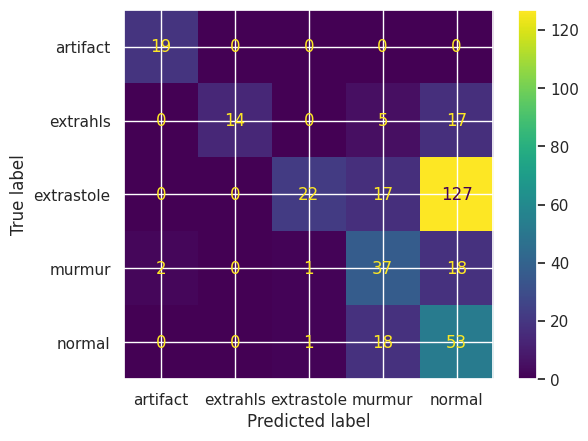

In [144]:
cm_cnn_re=confusion_matrix(Model.predict(x_test_re_cnn).argmax(axis=1),y_test_re_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn_re, display_labels = label_names)
disp.plot()
plt.show()

11/11 [==============================] - 1s 47ms/step


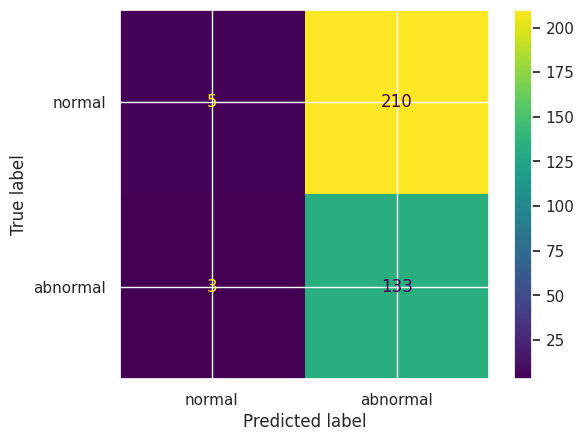

In [145]:
cm_cnn_re_bin = bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn_re_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [146]:
bin_accuracy_score(bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

11/11 [==============================] - 0s 38ms/step


0.39316239316239315

In [147]:
bin_f1_score(bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

11/11 [==============================] - 0s 35ms/step


(0.3877551020408163, 0.9779411764705882, 0.5553235908141962)

In [148]:
y_pred_proba_test_re_CNN = bin_prob(Model.predict(x_test_re_cnn))[::,1]
fpr_test_re_CNN, tpr_test_re_CNN, _ = roc_curve(y_bin_cnn(y_test_re_cnn),  y_pred_proba_test_re_CNN)
roc_auc_test_re_CNN = auc(fpr_test_re_CNN, tpr_test_re_CNN)
precision_test_re_CNN, recall_test_re_CNN, thresholds_test_re_CNN = precision_recall_curve(y_bin_cnn(y_test_re_cnn),y_pred_proba_test_re_CNN)

11/11 [==============================] - 0s 35ms/step


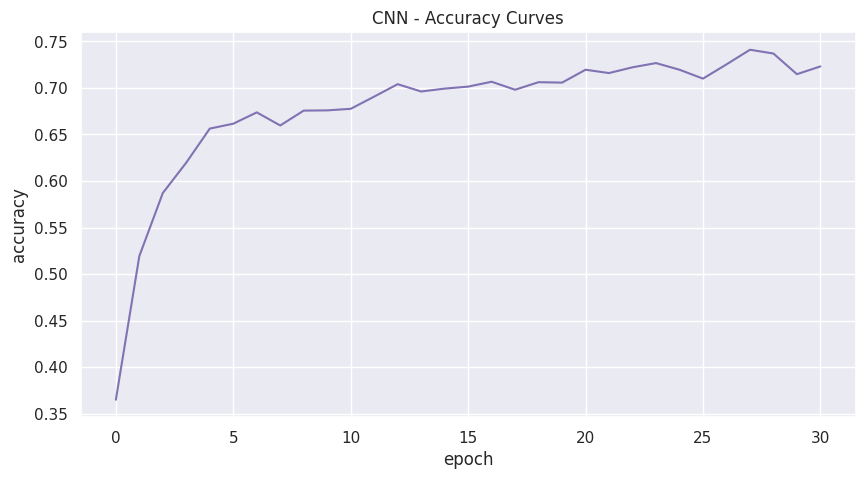

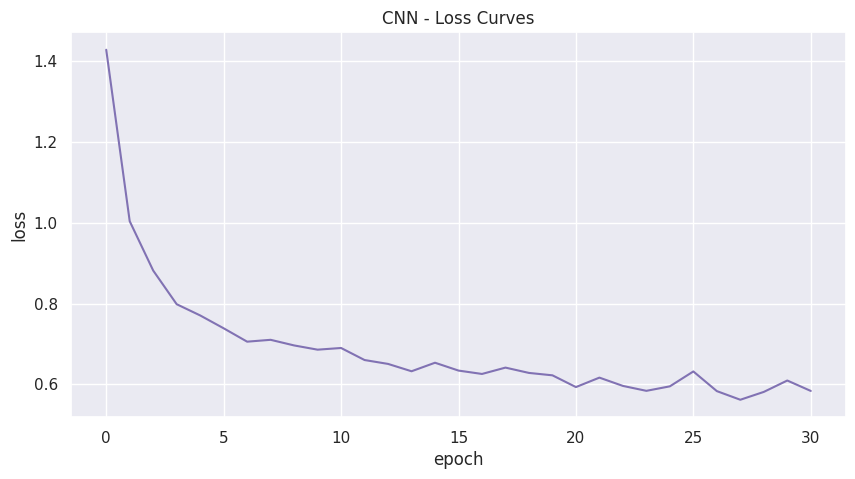

In [149]:
accuracy = Conv1D_Model.history['accuracy']
loss = Conv1D_Model.history['loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## 🔸CNN 1D Experiment

In [150]:
Conv1D_Model_2 = Model_2.fit(x_train_re_cnn, y_train_re_cnn,
                         epochs=70,
                                validation_data=(x_test_re_cnn, y_test_re_cnn), callbacks=[Early_Stopper,Checkpoint_Model])

Epoch 1/70
131/131 [==============================] - ETA: 0s - loss: 0.2440

131/131 [==============================] - 17s 133ms/step - loss: 0.2440 - val_loss: 0.1356
Epoch 2/70
131/131 [==============================] - ETA: 0s - loss: 0.2629

131/131 [==============================] - 18s 140ms/step - loss: 0.2629 - val_loss: 0.3761
Epoch 3/70
131/131 [==============================] - ETA: 0s - loss: 0.3200

131/131 [==============================] - 20s 153ms/step - loss: 0.3200 - val_loss: 0.3761
Epoch 4/70
131/131 [==============================] - ETA: 0s - loss: 0.3200

131/131 [==============================] - 19s 142ms/step - loss: 0.3200 - val_loss: 0.3761


In [153]:
Model_Results_2 = Model_2.evaluate(x_test_re_cnn,y_test_re_cnn)
# print(Model_Results_2)
print("LOSS:  " + "%.4f" % Model_Results_2)
print("ACCURACY:  " + "%.4f" % Model_Results_2)

11/11 [==============================] - 1s 50ms/step - loss: 0.3761
LOSS:  0.3761
ACCURACY:  0.3761


In [154]:
indexes_predict = tf.argmax(Model_2.predict(x_test_re_cnn), axis=1)
indexes_actual = tf.argmax(y_test_re_cnn, axis=1)
tf.math.confusion_matrix(indexes_actual, indexes_predict)

11/11 [==============================] - 0s 19ms/step


<tf.Tensor: shape=(5, 5), dtype=int32, numpy=
array([[ 21,   0,   0,   0,   0],
       [ 14,   0,   0,   0,   0],
       [ 24,   0,   0,   0,   0],
       [ 77,   0,   0,   0,   0],
       [215,   0,   0,   0,   0]], dtype=int32)>

In [155]:
bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))

11/11 [==============================] - 0s 20ms/step


array([[  0, 215],
       [  0, 136]])

11/11 [==============================] - 0s 19ms/step


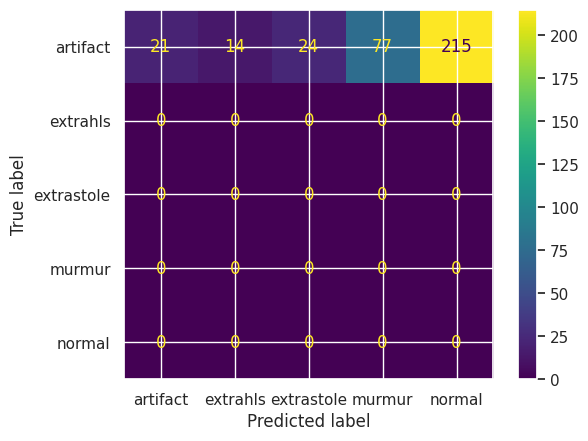

In [156]:
cm_cnn2_re=confusion_matrix(Model_2.predict(x_test_re_cnn).argmax(axis=1),y_test_re_cnn.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2_re, display_labels = label_names)
disp.plot()
plt.show()

11/11 [==============================] - 0s 20ms/step


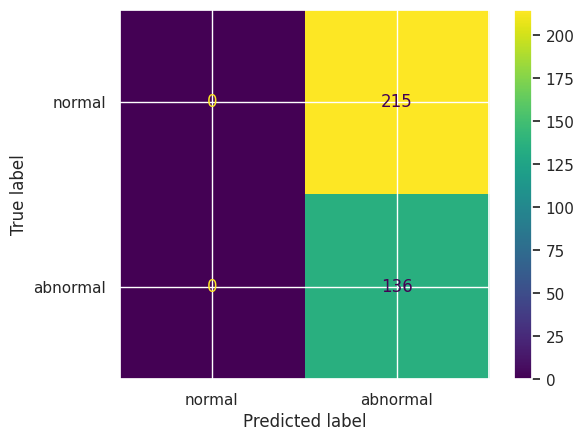

In [157]:
cm_cnn2_re_bin = bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn2_re_bin, display_labels = label_names_bin)
disp.plot()
plt.show()

In [158]:
bin_accuracy_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

11/11 [==============================] - 0s 19ms/step


0.38746438746438744

In [159]:
bin_f1_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn)))

11/11 [==============================] - 0s 19ms/step


(0.38746438746438744, 1.0, 0.5585215605749486)

In [160]:
y_pred_proba_test_re_CNN2 = bin_prob(Model_2.predict(x_test_re_cnn))[::,1]
fpr_test_re_CNN2, tpr_test_re_CNN2, _ = roc_curve(y_bin_cnn(y_test_re_cnn),  y_pred_proba_test_re_CNN2)
roc_auc_test_re_CNN2 = auc(fpr_test_re_CNN2, tpr_test_re_CNN2)
precision_test_re_CNN2, recall_test_re_CNN2, thresholds_test_re_CNN2 = precision_recall_curve(y_bin_cnn(y_test_re_cnn),y_pred_proba_test_re_CNN2)

11/11 [==============================] - 0s 19ms/step


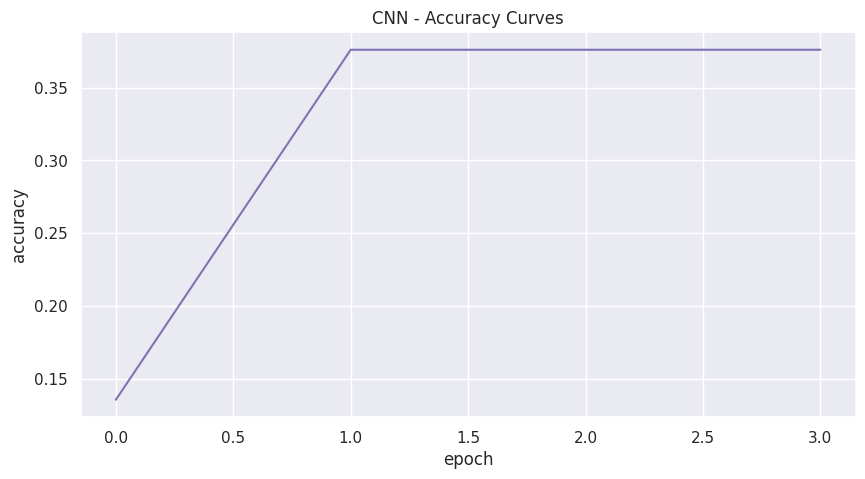

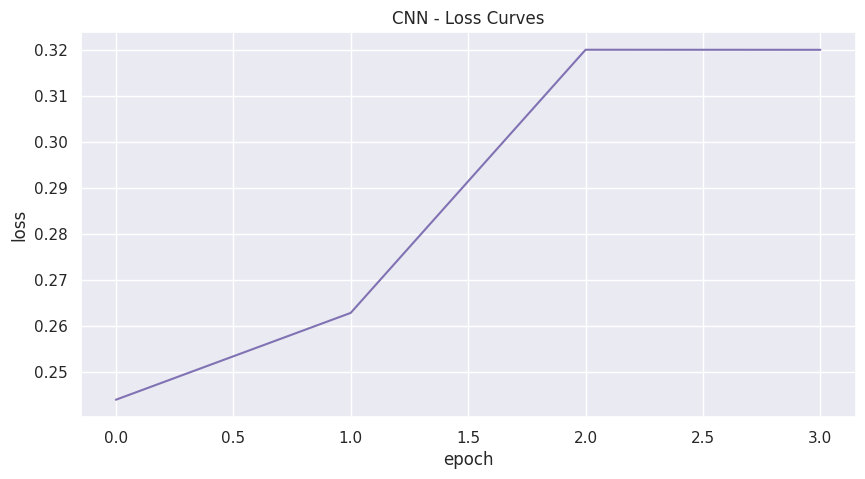

In [167]:
accuracy = Conv1D_Model_2.history['val_loss']   # check
loss = Conv1D_Model_2.history['loss']

plt.figure(1, figsize=(10, 5))
plt.title('CNN - Accuracy Curves')
plt.plot(accuracy, c='m')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.figure(2, figsize=(10, 5))
plt.title('CNN - Loss Curves')
plt.plot(loss, c='m')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()

## 🔹Rest of the Models

In [168]:
print(x_train_re.shape)
print(x_test_re.shape)
print(y_train_re.shape)
print(y_test_re.shape)

(4190, 162)
(351, 162)
(4190,)
(351,)


In [169]:
y_train_re = Label_Encode.fit_transform(y_train_re)
y_test_re = Label_Encode.transform(y_test_re)

In [170]:
reference_df_re = pd.DataFrame()
reference_df_re['Actual'] = df_upsampled["category"].values
reference_df_re['Encoded'] = y_train_re
reference_df_re.drop_duplicates()

,Actual,Encoded
0,normal,4
838,murmur,3
1676,extrastole,2
2514,extrahls,1
3352,artifact,0


## 🔸RandomForest Classifier

In [171]:
clf = RandomForestClassifier()

param_grid = {"n_estimators": [1, 10, 50, 100, 200, 300, 400, 500],
              "max_features": [1, 5, 10, "auto"],
              "criterion": ['gini','entropy'],
              "random_state": [17]}

# Grid search
clf_rfGCV_re = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_rfGCV_re = clf_rfGCV_re.fit(x_train_re, y_train_re)
print(clf_rfGCV_re.best_params_)

{'criterion': 'entropy', 'max_features': 10, 'n_estimators': 500, 'random_state': 17}


In [172]:
print('Accuracy Score: ',accuracy_score(y_test_re,clf_rfGCV_re.predict(x_test_re)))

Accuracy Score:  0.8148148148148148


In [173]:
print(confusion_matrix(y_test_re,clf_rfGCV_re.predict(x_test_re)))
print(bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

[[ 20   0   0   0   1]
 [  0  13   0   1   0]
 [  0   0   4   0  20]
 [  0   1   0  46  30]
 [  1   7   0   4 203]]
[[194  21]
 [ 43  93]]


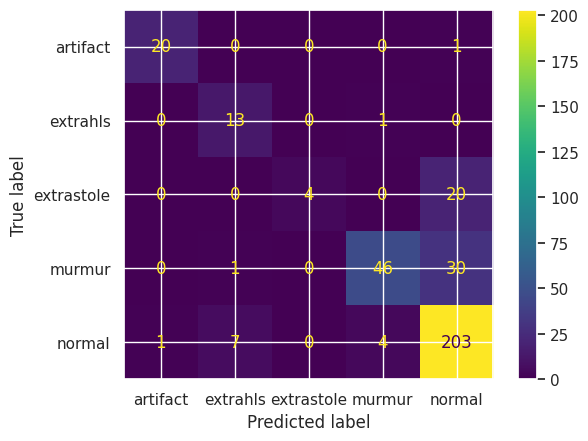

In [174]:
cm_rf_re=confusion_matrix(y_test_re,clf_rfGCV_re.predict(x_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_re, display_labels = label_names)
disp.plot()
plt.show()

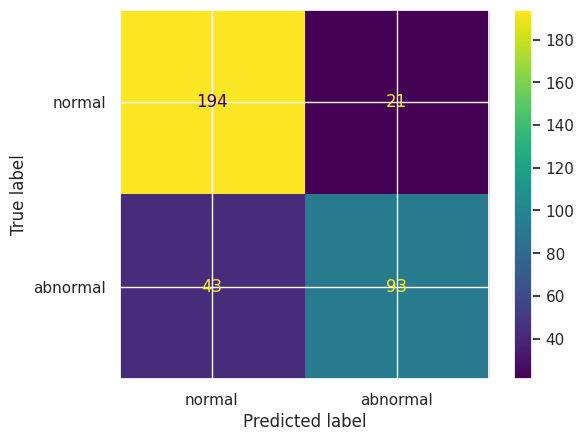

In [175]:
cm_rf_bin_re=bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_bin_re, display_labels = label_names_bin)
disp.plot()
plt.show()

In [176]:
bin_accuracy_score(bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

0.8176638176638177

In [177]:
bin_f1_score(bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

(0.8157894736842105, 0.6838235294117647, 0.744)

In [178]:
y_pred_proba_test_re_rf = bin_prob(clf_rfGCV_re.predict_proba(x_test_re))[::,1]
fpr_test_re_rf, tpr_test_re_rf, _ = roc_curve(y_bin(y_test_re),  y_pred_proba_test_re_rf)
roc_auc_test_re_rf = auc(fpr_test_re_rf, tpr_test_re_rf)
precision_test_re_rf, recall_test_re_rf, thresholds_test_re_rf = precision_recall_curve(y_bin(y_test_re),y_pred_proba_test_re_rf)

## 🔸LGBM Classifier

In [179]:
clf = LGBMClassifier()

param_grid = {"n_estimators": [100,500,600,700],
          "learning_rate": [0.01, 0.1, 0.5],
          "random_state": [17]
          }

# Grid search
clf_XGBGCV_re = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_XGBGCV_re = clf_XGBGCV_re.fit(x_train_re, y_train_re)
print(clf_XGBGCV_re.best_params_)

filterwarnings("ignore")

{'learning_rate': 0.1, 'n_estimators': 600, 'random_state': 17}


In [180]:
print('Accuracy Score: ',accuracy_score(y_test_re,clf_XGBGCV_re.predict(x_test_re)))

Accuracy Score:  0.8176638176638177


In [181]:
y_pred_proba_test_re_XGB = bin_prob(clf_XGBGCV_re.predict_proba(x_test_re))[::,1]
fpr_test_re_XGB, tpr_test_re_XGB, _ = roc_curve(y_bin(y_test_re),  y_pred_proba_test_re_XGB)
roc_auc_test_re_XGB = auc(fpr_test_re_XGB, tpr_test_re_XGB)
precision_test_re_XGB, recall_test_re_XGB, thresholds_test_re_XGB = precision_recall_curve(y_bin(y_test_re),y_pred_proba_test_re_XGB)

In [182]:
print(confusion_matrix(y_test_re,clf_XGBGCV_re.predict(x_test_re)))

print(bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

[[ 19   0   0   1   1]
 [  0  13   0   0   1]
 [  0   0   8   0  16]
 [  0   2   1  45  29]
 [  0   7   3   3 202]]
[[202  13]
 [ 47  89]]


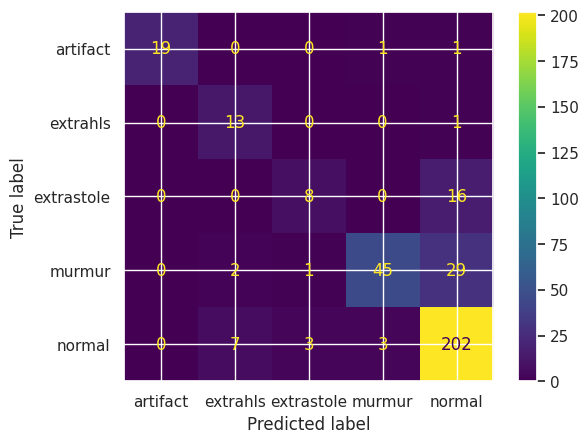

In [183]:
cm_rf_XGB=confusion_matrix(y_test_re,clf_XGBGCV_re.predict(x_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_XGB, display_labels = label_names)
disp.plot()
plt.show()

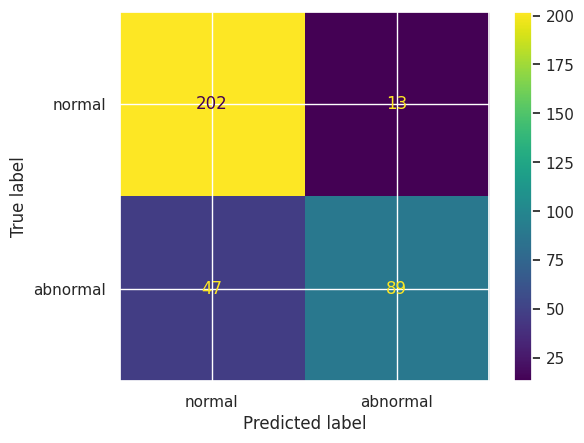

In [184]:
cm_XGB_bin_re=bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_XGB_bin_re, display_labels = label_names_bin)
disp.plot()
plt.show()

In [185]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

0.8290598290598291


In [186]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

(0.8725490196078431, 0.6544117647058824, 0.7478991596638657)


## 🔸CatBoost

In [4]:
clf = CatBoostClassifier(verbose=False)

param_grid = {'learning_rate': [0.03, 0.1, 0.5],
        'depth': [4, 6],
        'l2_leaf_reg': [0.05,0.5,1],
        "random_state": [17]
       }

# Grid search
clf_CBGCV_re = GridSearchCV(estimator = clf,param_grid = param_grid)
clf_CBGCV = clf_CBGCV_re.fit(x_train, y_train)
print(clf_CBGCV_re.best_params_)

filterwarnings("ignore")

In [5]:
y_pred_proba_test_re_CB = bin_prob(clf_CBGCV_re.predict_proba(x_test_re))[::,1]
fpr_test_re_CB, tpr_test_re_CB, _ = roc_curve(y_bin(y_test_re),  y_pred_proba_test_re_CB)
roc_auc_test_re_CB = auc(fpr_test_re_CB, tpr_test_re_CB)
precision_test_re_CB, recall_test_re_CB, thresholds_test_re_CB = precision_recall_curve(y_bin(y_test_re),y_pred_proba_test_re_CB)

In [ ]:
print(confusion_matrix(y_test_re,clf_CBGCV_re.predict(x_test_re)))

print(bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

In [ ]:
print('Accuracy Score: ',accuracy_score(y_test_re,clf_CBGCV_re.predict(x_test_re)))

In [ ]:
cm_rf_CB=confusion_matrix(y_test_re,clf_CBGCV_re.predict(x_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf_CB, display_labels = label_names)
disp.plot()
plt.show()

In [ ]:
cm_CB_bin_re=bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_CB_bin_re, display_labels = label_names_bin)
disp.plot()
plt.show()

In [ ]:
print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

In [ ]:
print(bin_f1_score(bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

In [ ]:
# Plot ROC curves

plt.plot(fpr_test_re_rf, tpr_test_re_rf)
plt.plot(fpr_test_re_XGB, tpr_test_re_XGB)
plt.plot(fpr_test_re_CB, tpr_test_re_CB)
plt.plot(fpr_test_re_CNN, tpr_test_re_CNN)
plt.plot(fpr_test_re_CNN2, tpr_test_re_CNN2)
plt.legend(['Random Forest(AUC = ' + str(round(roc_auc_test_re_rf,2))+')'\
            ,'LightGBM(AUC = ' + str(round(roc_auc_test_re_XGB,2))+')'\
            ,'CatBoost(AUC = ' + str(round(roc_auc_test_re_CB,2))+')'\
            ,'CNN(AUC = ' + str(round(roc_auc_test_re_CNN,2))+')'\
            ,'CNN2(AUC = ' + str(round(roc_auc_test_re_CNN2,2))+')'])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC-AUC')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

In [ ]:
plt.plot(recall_test_re_rf, precision_test_re_rf)
plt.plot(recall_test_re_XGB, precision_test_re_XGB)
plt.plot(recall_test_re_CB, precision_test_re_CB)
plt.plot(recall_test_re_CNN, precision_test_re_CNN)
plt.plot(recall_test_re_CNN2, precision_test_re_CNN2)
plt.legend(['Random Forest', 'LightGBM','CatBoost','CNN','CNN2'])
plt.ylabel('Precision')
plt.xlabel('Recall')
plt.title('Precision-Recall')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

# 💠Accuracy

In [11]:
# Accuracy
# before treating class imbalance
print("# Accuracy before treating class imbalance")
print('CNN Conv1D                       - '+'0.7122507122507122')
# print(bin_accuracy_score(bin_cf_matrix(bin_prob(Model.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))))

print('CNN1D Exp                        -'+'0.6210826210826211')
# print(bin_accuracy_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))))

print('random forest                      -'+'0.603988603988604')
# print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test))))

print('LGBMBoosting                      -'+'0.6723646723646723')
# print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test))))

print('CatBoost                         -'+'0.6638176638176638')
# print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test))))

# Accuracy
# After treating class imbalance
print(' ')
print("# Accuracy After treating class imbalance")
print('CNN Conv1D                         - '+'0.39316239316239315')
# print(bin_accuracy_score(bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))))

print('CNN1D Exp                      - '+'0.38746438746438744')
# print(bin_accuracy_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))))

print('random forest                     -'+'0.8176638176638177')
# print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

print('LGBMBoosting                       - '+'0.8290598290598291')
# print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

# print('CatBoost', end=" ")
# print(bin_accuracy_score(bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

# print("================================================================================================")
# '''
# The F1 score is a measure of a model's accuracy in binary classification. It is calculated by taking the harmonic mean of
# precision and recall. Precision is the fraction of predicted positive instances that are actually positive, while recall is the
# fraction of actual positive instances that are predicted positive.

# The F1 score is a more balanced measure of accuracy than accuracy itself, because it takes both precision and recall into
# account. This is important because precision and recall can sometimes conflict with each other. For example, a model that
# predicts all instances as positive will have high recall but low precision
# '''

# #f1 scores
# # before treating class imbalance
# print("# f1 scores before treating class imbalance")
# print('CNN Conv1D', end=" ")
# print(bin_f1_score(bin_cf_matrix(bin_prob(Model.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))))

# print('CNN1D Exp', end=" ")
# print(bin_f1_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_cnn)),y_bin_cnn(y_test_cnn))))

# print('random forest', end=" ")
# print(bin_f1_score(bin_cf_matrix(bin_prob(clf_rfGCV.predict_proba(x_test)),y_bin(y_test))))

# print('LGBMBoosting', end=" ")
# print(bin_f1_score(bin_cf_matrix(bin_prob(clf_XGBGCV.predict_proba(x_test)),y_bin(y_test))))

# print('CatBoost', end=" ")
# print(bin_f1_score(bin_cf_matrix(bin_prob(clf_CBGCV.predict_proba(x_test)),y_bin(y_test))))

# #f1 scores
# # After treating class imbalance
# print("# f1 scores After treating class imbalance")
# print('CNN Conv1D', end=" ")
# print(bin_f1_score(bin_cf_matrix(bin_prob(Model.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))))

# print('CNN1D Exp', end=" ")
# print(bin_f1_score(bin_cf_matrix(bin_prob(Model_2.predict(x_test_re_cnn)),y_bin_cnn(y_test_re_cnn))))

# print('random forest', end=" ")
# bin_f1_score(bin_cf_matrix(bin_prob(clf_rfGCV_re.predict_proba(x_test_re)),y_bin(y_test_re)))

# print('LGBMBoosting', end=" ")
# print(bin_f1_score(bin_cf_matrix(bin_prob(clf_XGBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))

# print('CatBoost', end=" ")
# print(bin_f1_score(bin_cf_matrix(bin_prob(clf_CBGCV_re.predict_proba(x_test_re)),y_bin(y_test_re))))


# Accuracy before treating class imbalance
CNN Conv1D                       - 0.7122507122507122
CNN1D Exp                        -0.6210826210826211
random forest                      -0.603988603988604
LGBMBoosting                      -0.6723646723646723
CatBoost                         -0.6638176638176638
 
# Accuracy After treating class imbalance
CNN Conv1D                         - 0.39316239316239315
CNN1D Exp                      - 0.38746438746438744
random forest                     -0.8176638176638177
LGBMBoosting                       - 0.8290598290598291


* CNN (Convolutional Neural Network):
A Convolutional Neural Network (CNN) is a type of deep learning model primarily used for image processing and computer vision tasks. It's inspired by the organization of the animal visual cortex. CNNs are designed to automatically learn and extract meaningful features from images by utilizing a hierarchical structure of layers. The network typically consists of convolutional layers, pooling layers, and fully connected layers. Convolutional layers apply filters to the input image, extracting features at different scales. Pooling layers reduce the dimensionality of the features, making the model more efficient. Fully connected layers combine the extracted features and make predictions. CNNs have been successful in tasks like image classification, object detection, and image segmentation.


* Catboost:
Catboost is a machine learning algorithm that belongs to the family of gradient boosting models. It is specifically designed to handle categorical features effectively. Gradient boosting is an ensemble method that combines multiple weak models (decision trees) to create a strong predictive model. Catboost improves upon traditional gradient boosting algorithms by employing techniques such as ordered boosting, which deals with categorical features more efficiently, and gradient-based preprocessing, which helps handle missing values. Catboost automatically handles categorical variables, removing the need for manual encoding or preprocessing. It has gained popularity in Kaggle competitions and is known for its fast training speed and good performance.


* LGBM (LightGBM):
LGBM, short for LightGBM, is another gradient boosting model similar to Catboost. It is known for its high efficiency and fast training speed. LightGBM uses a technique called gradient-based one-side sampling, which selects the most informative data points during the training process. This sampling strategy reduces the computational resources required and speeds up the model training. LGBM also supports categorical features and employs leaf-wise tree growth, which further enhances its performance. LightGBM has become popular for various machine learning tasks, including classification, regression, and ranking problems.


* Random Forest:
Random Forest is an ensemble learning algorithm that combines multiple decision trees to make predictions. It works by creating a collection of decision trees, each trained on a random subset of the training data and using a random subset of features. During prediction, each tree in the random forest independently provides its prediction, and the final prediction is determined by majority voting or averaging the results. Random Forests are versatile and can be used for both regression and classification tasks. They are known for their ability to handle large datasets, high-dimensional feature spaces, and provide robust predictions while reducing overfitting.

==> CNNs are deep learning models commonly used for image processing and computer vision tasks. Catboost and LGBM are gradient boosting models, with Catboost specifically designed for handling categorical features efficiently. LGBM is known for its high efficiency and fast training speed. Random Forest is an ensemble learning algorithm that combines decision trees and is versatile for both regression and classification problems.